In [1]:
import utils as ut
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from matplotlib import pyplot as plt
#import seaborn as sns
%matplotlib inline

In [2]:
#Load paths
samples='sample_matrix.csv'
results='results.txt'
results_new='results.csv'
path_EML='EML21/'
path_MD3='MD3/'
path_MD1='MD1/'
path_TK='TK/'
path_USPrr='US-Prr/SA/'

In [154]:
ut.get_best_match?

In [5]:
sa_folder = 'sa-nmax-TK-075-EJ/' #nmax only

[df_param_TK,df_model_TK]=read_samples_resutls(path_TK+sa_folder+samples,
                                               path_TK+sa_folder+'results.csv')

npp_param_TK = df_param_TK.iloc[:,:8].copy()
npp_model_TK = df_model_TK.iloc[:,:8].copy()
npp_param_TK.columns =  ['nmax0','nmax1','nmax2','nmax3','nmax4','nmax5','nmax6','nmax7']
npp_model_TK.columns = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7']


In [3]:
#Load GPP data from four sites 
def read_samples_resutls(paths,pathr):
    df_param = pd.read_csv(paths)
    df_model = pd.read_csv(pathr,header=None)
    return [df_param,df_model]

#EML
sa_folder='sa_cmax_EML21_090_AK/'
[gpp_param_EML,df_model_EML0]=read_samples_resutls(path_EML+sa_folder+samples,
                                                 path_EML+sa_folder+results)
df_model_EML0.columns = ['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6','NA','NA']
gpp_param_EML.columns =  ['cmax0','cmax1','cmax2','cmax3','cmax4','cmax5','cmax6']
gpp_model_EML=df_model_EML0.iloc[:,:-2].copy()

#MD3
sa_folder = 'sa_cmax_MD3_050_AK/'
[gpp_param_MD3,gpp_model_MD3]=read_samples_resutls(path_MD3+sa_folder+samples,
                                                 path_MD3+sa_folder+results)
gpp_param_MD3.columns = ['cmax0','cmax1','cmax2','cmax3']
gpp_model_MD3.columns = ['GPP0','GPP1','GPP2','GPP3']

#MD1
sa_folder = 'SA-MD1-STEP1/'
[gpp_param_MD1,gpp_model_MD1]=read_samples_resutls(path_MD1+sa_folder+samples,
                                                 path_MD1+sa_folder+results)
gpp_param_MD1.columns = ['cmax0','cmax1','cmax2','cmax3']
gpp_model_MD1.columns = ['GPP0','GPP1','GPP2','GPP3']

#CPF
sa_folder = 'STEP1-cmax-GPP/'
[gpp_param_USPrr,gpp_model_USPrr]=read_samples_resutls(path_USPrr+sa_folder+samples,
                                                     path_USPrr+sa_folder+'results.csv')
gpp_param_USPrr.columns = ['cmax0','cmax1','cmax2','cmax3','cmax4']
gpp_model_USPrr.columns = ['GPP0','GPP1','GPP2','GPP3','GPP4']

sa_folder = 'sa-cmax-TK-075-EJ/'
[gpp_param_TK,gpp_model_TK]=read_samples_resutls(path_TK+sa_folder+samples,
                                               path_TK+sa_folder+'results.csv')
gpp_model_TK.columns = ['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6','GPP7']
gpp_param_TK.columns =  ['cmax0','cmax1','cmax2','cmax3','cmax4','cmax5','cmax6','cmax7']

In [5]:
gpp_param_MD1
gpp_model_MD1

,GPP0,GPP1,GPP2,GPP3
0,247.941825,43.630780,63.702678,62.791961
1,139.592580,10.593281,13.564094,83.261826
2,368.682895,32.804915,10.911346,95.112943
3,477.904659,13.882124,23.064703,26.608003
4,204.237388,25.607911,41.812459,36.036832
...,...,...,...,...
996,458.124507,42.465655,16.577726,50.039683
997,217.462858,42.861522,15.857806,29.088301
998,420.317838,6.512898,45.369789,48.680002
999,226.848546,21.634226,49.222719,24.742752


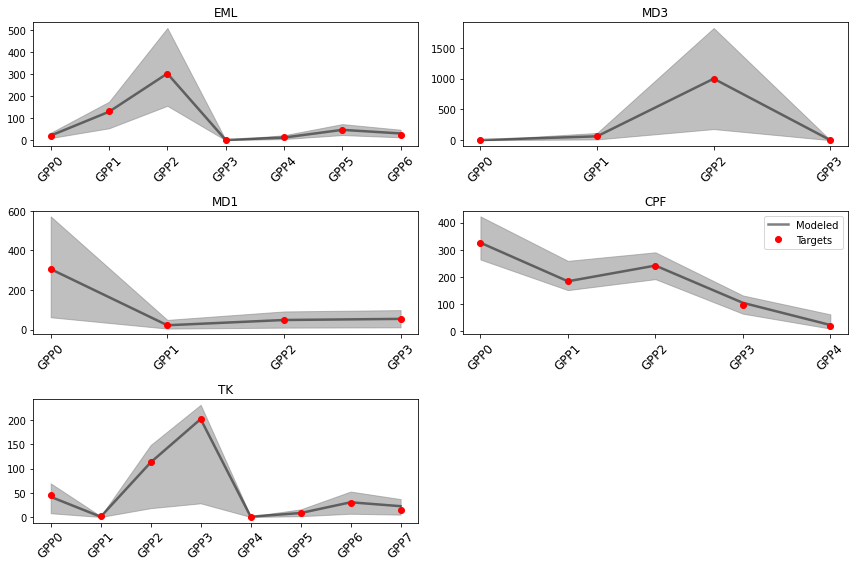

In [68]:
def plot_model_target_data(dict_of_dfs={}):
    '''
    Example:
        dict_of_dfs = {
            'EML': [gpp_param_EML, gpp_model_EML],
            'MD3': [df_param_MD3,df_model_MD3],
            'MD1': [df_param_MD1,df_model_MD1],
            'CPF': [df_param_USPrr,df_model_USPrr]
        }
    '''
    def best_mean_match_plot(site_name,df_x,df_y,ylabel,ax):
        ''' plots the spaghetti plot of modeled v.s. observed values 
            df_x: parameter dataframe
            df_y: model output dataframe
            logy: True enables the logplot option
        '''
        nrange=range(len(df_y.columns))
        df_xx, df_yy =  ut.get_best_match(df_x,df_y)

        rmetric='r2rmse'
        nelem=10
        order=True
        y=df_yy.sort_values(by=[rmetric],ascending=order)[:nelem]

        yy=y.iloc[:,:-6]
        yy.columns = list(nrange)
        ax.plot(yy.mean().transpose(),alpha=0.5,color='black',linewidth=2.5)
        ax.plot(df_y.iloc[-1,:],'o',color='red')
        if site_name=='CPF':
            ax.legend(['Modeled','Targets'])
        ax.fill_between(nrange, df_y.iloc[0:-1,:].min(), df_y.iloc[0:-1,:].max(), alpha=0.5,color='grey')
        ax.set_xticklabels(df_y.columns, rotation=45, fontsize=12)
        ax.set_title(f"{site_name}")
        #ax.setxtick(df_y.columns,fontsize=12)
        #ax.setylabel(ylabel,fontsize=14)
        #ax.xlim([-0.1,6.1])


    # Create the main figure with 4 subplots
    fig, axes = plt.subplots(3, 2, figsize=(12, 8))
    
    # List of cases for inner plots
    if not dict_of_dfs:
        print('Provide a list of dataframes')
        return

    for ax, case in zip(axes.ravel(), dict_of_dfs):
        ax.axis('off')
        ## Embed the inner figure in each subplot
        inner_ax = ax.inset_axes([0., 0., 1, 1])
        if case=='empty':
            inner_ax.axis('off')
        else:       
            best_mean_match_plot(case,dict_of_dfs[case][0],dict_of_dfs[case][1],'GPP',inner_ax)           
        
    plt.tight_layout()
       
    return

dict_of_dfs = {
    'EML': [gpp_param_EML,gpp_model_EML],
    'MD3': [gpp_param_MD3,gpp_model_MD3],
    'MD1': [gpp_param_MD1,gpp_model_MD1],
    'CPF': [gpp_param_USPrr,gpp_model_USPrr],
    'TK': [gpp_param_TK,gpp_model_TK],
    'empty': []
}

plot_model_target_data(dict_of_dfs)


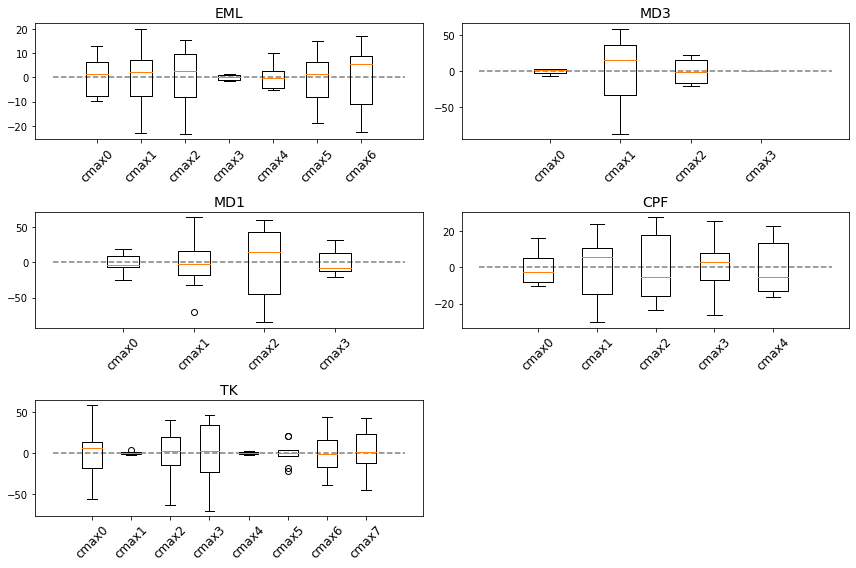

In [69]:
def plot_model_param_data(dict_of_dfs={}):
    def best_mean_box_plot(site_name,df_x,df_y,ylabel,ax):
        ''' plots the spaghetti plot of modeled v.s. observed values 
            df_x: parameter dataframe
            df_y: model output dataframe
            logy: True enables the logplot option
        '''
        nrange=range(len(df_y.columns))
        df_xx, df_yy =  ut.get_best_match(df_x,df_y)

        rmetric='r2rmse'
        nelem=10
        order=True

        x=df_xx.sort_values(by=[rmetric],ascending=order)[:nelem]
        xx=x.iloc[:,:-6]
        ax.boxplot((xx-xx.mean()).values, labels=xx.columns)
        ax.plot(np.zeros(len(xx.columns)+2),'--',color='black',alpha=0.5)
        ax.set_xticks(range(1, len(xx.columns) + 1))
        ax.set_xticklabels(xx.columns, rotation=45, fontsize=12)
        #ax.set_xlim([0,len(xx.columns)+1])
        ax.set_title(f"{site_name}",fontsize=14)


    # Create the main figure with 4 subplots
    fig, axes = plt.subplots(3, 2, figsize=(12, 8))

    # List of cases for inner plots

    for ax, case in zip(axes.ravel(), dict_of_dfs):
        ax.axis('off')
        #print(case)
        ## Embed the inner figure in each subplot
        inner_ax = ax.inset_axes([0., 0., 1, 1])
        if case=='empty':
            inner_ax.axis('off')
        else:       
            best_mean_box_plot(case,dict_of_dfs[case][0],dict_of_dfs[case][1],'GPP',inner_ax) 

    plt.tight_layout()

dict_of_dfs = {
    'EML': [gpp_param_EML, gpp_model_EML],
    'MD3': [gpp_param_MD3,gpp_model_MD3],
    'MD1': [gpp_param_MD1,gpp_model_MD1],
    'CPF': [gpp_param_USPrr,gpp_model_USPrr],
    'TK': [gpp_param_TK,gpp_model_TK],
    'empty': []
}

plot_model_param_data(dict_of_dfs)

In [76]:
gpp_param_EML

,cmax0,cmax1,cmax2,cmax3,cmax4,cmax5,cmax6
0,28.859824,249.522861,529.757395,3.515707,15.744447,49.199589,23.997595
1,45.083813,189.391782,519.471208,1.665870,35.277836,99.933198,30.630582
2,22.500224,117.545576,345.824164,3.279221,22.366680,59.342186,47.809674
3,21.103297,136.248880,372.535593,3.059424,30.844223,52.475534,43.612081
4,36.049681,93.989471,476.244286,2.145677,13.561238,108.666415,63.022177
...,...,...,...,...,...,...,...
995,20.673320,230.919374,370.738089,3.713503,23.299594,52.419733,47.372524
996,18.502541,157.094903,450.044424,2.995350,29.968132,99.594372,54.663452
997,17.780827,119.390149,445.741229,4.591431,32.038963,100.690088,34.537952
998,30.671781,166.961423,282.669781,1.699418,34.725670,55.553444,31.817803


In [82]:
df_xx, df_yy =  ut.get_best_match(gpp_param_EML, gpp_model_EML)
df_xx
rmetric='r2rmse'
nelem=10
order=True
#y=df_yy.sort_values(by=[rmetric],ascending=order)[:nelem]
x=df_xx.sort_values(by=[rmetric],ascending=order)[:nelem]
x
n=len(x.columns)
n
#ut.plot_hist_dist(x)

13

In [93]:
axes[0]

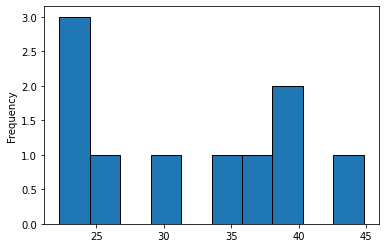

In [107]:
axes[14]
x['cmax0'].plot(kind='hist', ec='k')

AttributeError: 'SubplotSpec' object has no attribute 'is_first_col'

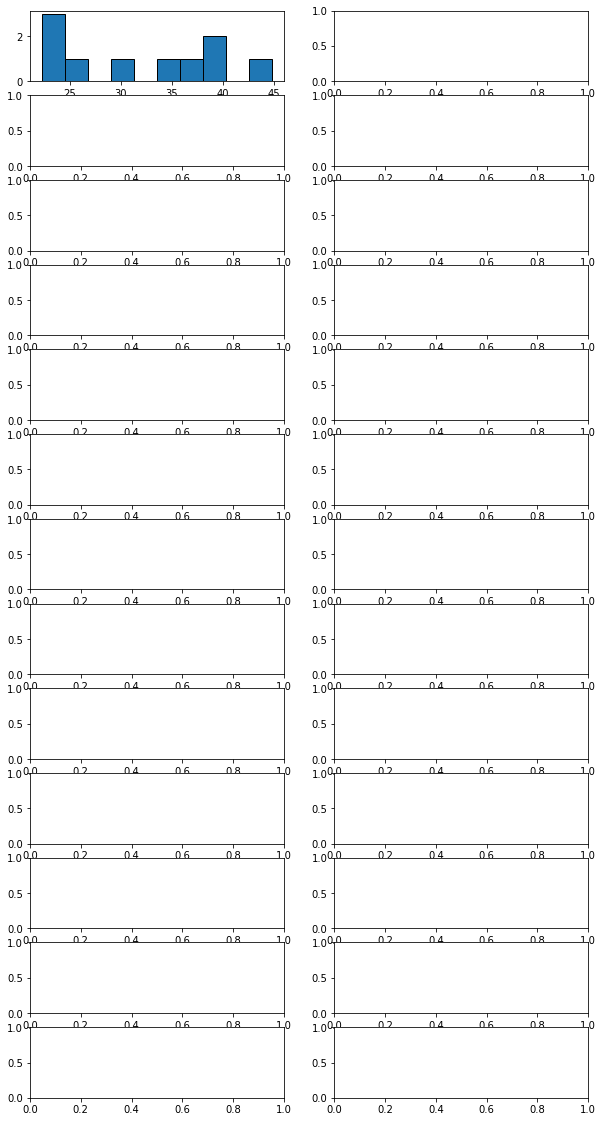

In [92]:
fig, axes = plt.subplots(n, 2, figsize=(10,20), sharex=False, sharey=False)
axes = axes.flat
i=0
#for ilist in x.columns:
#    print(ilist)
x['cmax0'].plot(ax=axes[i], kind='hist', ec='k')
#x['cmax0'].plot(ax=axes[i+1], kind='kde',linewidth=2)
#axes[i].set_title(ilist, fontsize=12)
#i+=2

In [8]:
sa_folder = 'STEP2-nmax_krb-NPP_vegc/'
[df_param_USPrr,df_model_USPrr]=read_samples_resutls(path_USPrr+sa_folder+samples,
                                                     path_USPrr+sa_folder+'results.csv')
output_name_USPrr = ['NPP0','NPP1','NPP2','NPP3','NPP4',\
                     'VEGC00','VEGC10','VEGC20',\
                     'VEGC01',\
                     'VEGC02','VEGC12','VEGC22',\
                     'VEGC03','VEGC23',\
                     'VEGC04']

df_model_USPrr.columns = output_name_USPrr
npp_param_USPrr = df_param_USPrr.iloc[:,:5].copy()
npp_model_USPrr = df_model_USPrr.iloc[:,:5].copy()
npp_param_USPrr.columns =  ['nmax0','nmax1','nmax2','nmax3','nmax4']

krb_param_USPrr = df_param_USPrr.iloc[:,5:].copy()
vegc_model_USPrr = df_model_USPrr.iloc[:,5:].copy()

krb_param_USPrr.columns = ['krb00','krb01','krb02','krb03','krb04',
                         'krb10','krb11',
                         'krb20','krb21','krb22'] 
krb_param_USPrr

,krb00,krb01,krb02,krb03,krb04,krb10,krb11,krb20,krb21,krb22
0,-1.167065,-11.741545,-13.493852,-7.926882,-1.484073,-3.345136,-0.189876,-19.550885,-17.754123,-7.871592
1,-12.649285,-9.934396,-8.849061,-5.500558,-12.938570,-7.807582,-8.351029,-9.102440,-7.254382,-14.836961
2,-6.044262,-4.298092,-13.015585,-11.947391,-12.165730,-16.181724,-18.781789,-8.240770,-0.314588,-16.680089
3,-1.181097,-11.862348,-6.826800,-10.749390,-7.451285,-11.052982,-16.246218,-9.892841,-9.481174,-3.868983
4,-2.207419,-1.694568,-18.902384,-3.669233,-19.249822,-12.693324,-9.208230,-17.052794,-5.148355,-19.833741
...,...,...,...,...,...,...,...,...,...,...
495,-17.471640,-9.999619,-8.830617,-13.278660,-18.574153,-1.224280,-4.610273,-3.306266,-12.699319,-4.859463
496,-0.134447,-19.021139,-11.221242,-11.003339,-14.017425,-8.630104,-17.015457,-4.400144,-13.384290,-8.232282
497,-9.986227,-4.702178,-2.536844,-17.934740,-12.341360,-4.555280,-11.410130,-13.388667,-11.814678,-8.003390
498,-8.879537,-9.163015,-15.915845,-6.162945,-5.251970,-14.843946,-13.152415,-0.289614,-12.552137,-4.860047


In [108]:
# EML
sa_folder = 'sa_nmaxkrbcfallnfall_EML21_090_AK-2/'
df_param_EML = pd.read_csv(path_EML+sa_folder+samples)
df_model_EML = pd.read_csv(path_EML+sa_folder+results,header=None)

output_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6',
               'VEGC00','VEGC10','VEGC20',
               'VEGC01','VEGC11','VEGC21', 
               'VEGC02','VEGC22','VEGC03','VEGC23','VEGC04','VEGC05','VEGC06',
               'VEGN00','VEGN10','VEGN20',
               'VEGN01','VEGN11','VEGN21', 
               'VEGN02','VEGN22','VEGN03','VEGN23','VEGN04','VEGN05','VEGN06']
df_model_EML.columns=output_name

cfall_param_EML=df_param_EML.iloc[:,20:33].copy()
cfall_param_EML.columns = ['cfall00','cfall01','cfall02','cfall03','cfall04','cfall05','cfall06',
                         'cfall10','cfall11',
                         'cfall20','cfall21','cfall22','cfall23']
nfall_param_EML=df_param_EML.iloc[:,33:].copy()
nfall_param_EML.columns = ['nfall00','nfall01','nfall02','nfall03','nfall04','nfall05','nfall06',
                         'nfall10','nfall11',
                         'nfall20','nfall21','nfall22','nfall23']
cveg_model_EML=df_model_EML.iloc[:,7:20].copy()
nveg_model_EML=df_model_EML.iloc[:,20:].copy()

In [70]:
# EML
sa_folder='sa_nmaxkrb_EML21_090_AK-2/'
[df_param,df_model]=read_samples_resutls(path_EML+sa_folder+samples,
                                                 path_EML+sa_folder+results)
output_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6',
               'VEGC00','VEGC10','VEGC20',
               'VEGC01','VEGC11','VEGC21', 
               'VEGC02','VEGC22','VEGC03','VEGC23','VEGC04','VEGC05','VEGC06']
df_model.columns = output_name
npp_param_EML = df_param.iloc[:,:7].copy()
npp_model_EML = df_model.iloc[:,:7].copy()
npp_param_EML.columns =  ['nmax0','nmax1','nmax2','nmax3','nmax4','nmax5','nmax6']

krb_param_EML = df_param.iloc[:,7:].copy()
vegc_model_EML = df_model.iloc[:,7:].copy()
krb_param_EML.columns = ['krb00','krb01','krb02','krb03','krb04','krb05','krb06',
                         'krb10','krb11',
                         'krb20','krb21','krb22','krb23'] 

# MD3
sa_folder = 'sa_nmaxkrb_MD3_090_AK/'
[df_param_MD3,df_model_MD3]=read_samples_resutls(path_MD3+sa_folder+samples,
                                                 path_MD3+sa_folder+results)
output_name_MD3 = ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03'
                   ]
df_model_MD3.columns = output_name_MD3
npp_param_MD3 = df_param_MD3.iloc[:,:4].copy()
npp_model_MD3 = df_model_MD3.iloc[:,:4].copy()
npp_param_MD3.columns =  ['nmax0','nmax1','nmax2','nmax3']

krb_param_MD3 = df_param_MD3.iloc[:,4:].copy()
vegc_model_MD3 = df_model_MD3.iloc[:,4:].copy()
krb_param_MD3.columns = ['krb00','krb01','krb02','krb03',
                         'krb10','krb11','krb12',
                         'krb20','krb21','krb22'] 

# MD1
sa_folder = 'SA-MD1-STEP2/'
[df_param_MD1,df_model_MD1]=read_samples_resutls(path_MD1+sa_folder+samples,
                                                 path_MD1+sa_folder+'results.csv')
output_name_MD1 = ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03'
                   ]
df_model_MD1.columns = output_name_MD1
npp_param_MD1 = df_param_MD1.iloc[:,:4].copy()
npp_model_MD1 = df_model_MD1.iloc[:,:4].copy()
npp_param_MD1.columns =  ['nmax0','nmax1','nmax2','nmax3']

krb_param_MD1 = df_param_MD1.iloc[:,4:].copy()
vegc_model_MD1 = df_model_MD1.iloc[:,4:].copy()
krb_param_MD1.columns = ['krb00','krb01','krb02','krb03',
                         'krb10','krb11','krb12',
                         'krb20','krb21','krb22']

#TK
sa_folder = 'sa-nmax-TK-075-EJ/' #nmax only

[df_param_TK,df_model_TK]=read_samples_resutls(path_TK+sa_folder+samples,
                                               path_TK+sa_folder+'results.csv')

npp_param_TK = df_param_TK.iloc[:,:8].copy()
npp_model_TK = df_model_TK.iloc[:,:8].copy()
npp_param_TK.columns =  ['nmax0','nmax1','nmax2','nmax3','nmax4','nmax5','nmax6','nmax7']
npp_model_TK.columns = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7']

sa_folder = 'sa-krb-NPPVEGC-TK-EJ-075/' #krb only
[df_param_TK,df_model_TK]=read_samples_resutls(path_TK+sa_folder+samples,
                                               path_TK+sa_folder+'results.csv')
model_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7', \
              'VEGC00','VEGC10','VEGC20', 
              'VEGC01','VEGC11','VEGC21',
              'VEGC02','VEGC12','VEGC22',
              'VEGC03','VEGC23','VEGC04','VEGC24','VEGC05','VEGC06','VEGC07']
df_model_TK.columns = model_name
krb_param_TK = df_param_TK.copy()
npp_model_TK = df_model_TK.iloc[:,:8].copy()
vegc_model_TK = df_model_TK.iloc[:,8:].copy()

krb_param_TK.columns = ['krb00','krb01','krb02','krb03','krb04','krb05','krb06','krb07',
                         'krb10','krb11','krb12',
                         'krb20','krb21','krb22','krb23','krb24'] 

#CPF
sa_folder = 'STEP2-nmax_krb-NPP_vegc/'
[df_param_USPrr,df_model_USPrr]=read_samples_resutls(path_USPrr+sa_folder+samples,
                                                     path_USPrr+sa_folder+'results.csv')
output_name_USPrr = ['NPP0','NPP1','NPP2','NPP3','NPP4',\
                     'VEGC00','VEGC10','VEGC20',\
                     'VEGC01',\
                     'VEGC02','VEGC12','VEGC22',\
                     'VEGC03','VEGC23',\
                     'VEGC04']

df_model_USPrr.columns = output_name_USPrr
npp_param_USPrr = df_param_USPrr.iloc[:,:5].copy()
npp_model_USPrr = df_model_USPrr.iloc[:,:5].copy()
npp_param_USPrr.columns =  ['nmax0','nmax1','nmax2','nmax3','nmax4']

krb_param_USPrr = df_param_USPrr.iloc[:,5:].copy()
vegc_model_USPrr = df_model_USPrr.iloc[:,5:].copy()

krb_param_USPrr.columns = ['krb00','krb01','krb02','krb03','krb04',
                         'krb10','krb11',
                         'krb20','krb21','krb22'] 

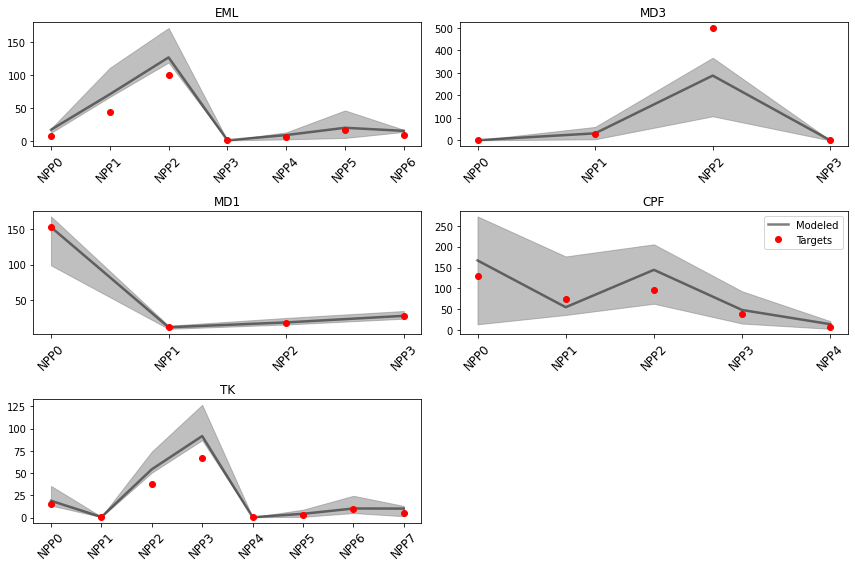

In [71]:
dict_of_dfs = {
    'EML': [npp_param_EML, npp_model_EML],
    'MD3': [npp_param_MD3,npp_model_MD3],
    'MD1': [npp_param_MD1,npp_model_MD1],
    'CPF': [npp_param_USPrr,npp_model_USPrr],
    'TK': [npp_param_TK,npp_model_TK],
    'empty': []
}

plot_model_target_data(dict_of_dfs)

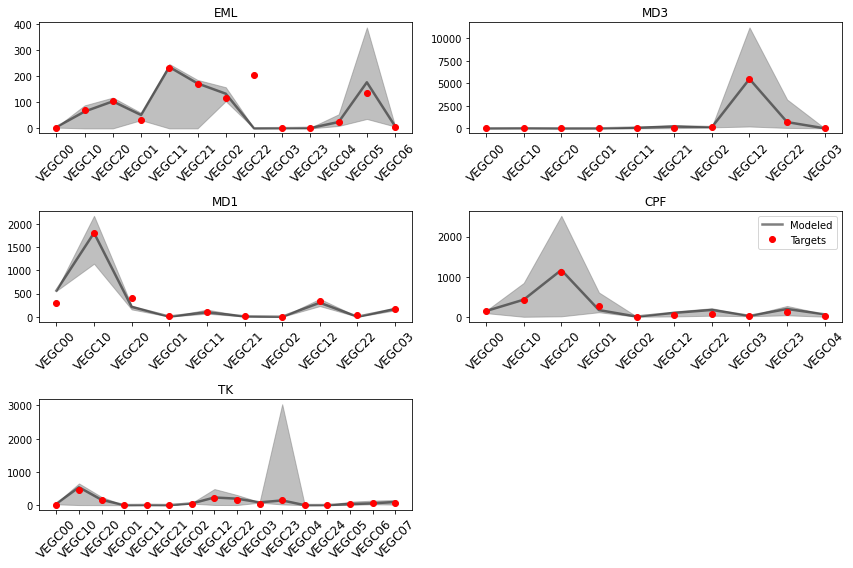

In [72]:
dict_of_dfs = {
    'EML': [krb_param_EML,vegc_model_EML],
    'MD3': [krb_param_MD3,vegc_model_MD3],
    'MD1': [krb_param_MD1,vegc_model_MD1],
    'CPF': [krb_param_USPrr,vegc_model_USPrr],
    'TK': [krb_param_TK,vegc_model_TK],
    'empty': []
}

plot_model_target_data(dict_of_dfs)

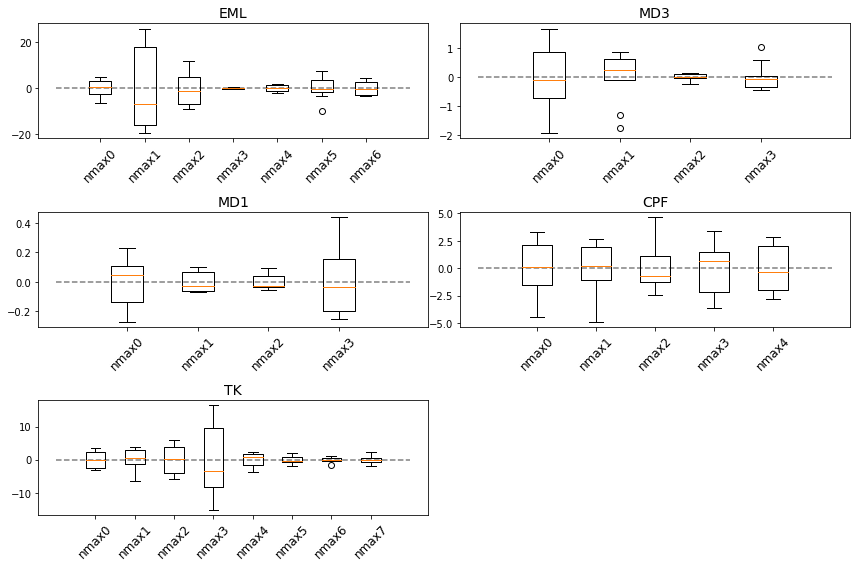

In [73]:
dict_of_dfs = {
    'EML': [npp_param_EML, npp_model_EML],
    'MD3': [npp_param_MD3,npp_model_MD3],
    'MD1': [npp_param_MD1,npp_model_MD1],
    'CPF': [npp_param_USPrr,npp_model_USPrr],
    'TK': [npp_param_TK,npp_model_TK],
    'empty': []
}

plot_model_param_data(dict_of_dfs)

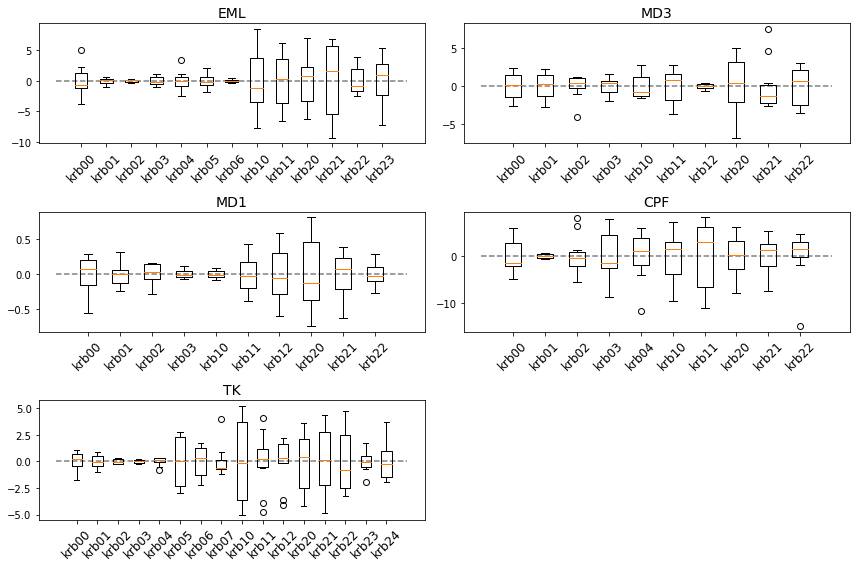

In [74]:
dict_of_dfs = {
    'EML': [krb_param_EML, npp_model_EML],
    'MD3': [krb_param_MD3,npp_model_MD3],
    'MD1': [krb_param_MD1,npp_model_MD1],
    'CPF': [krb_param_USPrr,npp_model_USPrr],
    'TK': [krb_param_TK,npp_model_TK],
    'empty': []
}

plot_model_param_data(dict_of_dfs)

In [98]:
npp_model_EML[['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6']]

,NPP0,NPP1,NPP2,NPP3,NPP4,NPP5,NPP6
0,16.567849,105.327345,145.830887,0.697709,12.386313,40.552046,14.652185
1,16.866511,107.775526,125.435401,0.857248,2.827756,4.806077,16.387838
2,17.346697,103.295022,125.838143,0.929164,10.790742,43.193693,15.080001
3,17.850703,73.840668,166.542676,0.797209,2.947092,4.539013,16.279861
4,17.385780,103.879817,138.445234,0.639121,10.192249,35.146309,14.488820
...,...,...,...,...,...,...,...
496,17.455563,109.664003,161.939075,0.931627,2.580120,6.051986,14.887114
497,17.136985,109.690451,144.437322,0.822955,10.250050,8.716069,15.339181
498,13.731239,106.509671,128.505462,0.737298,12.386378,45.330394,14.394149
499,17.141020,71.829708,156.326293,0.806037,3.656866,13.572000,16.542176


In [ ]:
dict_of_dfs = {
    'EML': [krb_param_EML,vegc_model_EML],
    'MD3': [krb_param_MD3,vegc_model_MD3],
    'MD1': [krb_param_MD1,vegc_model_MD1],
    'CPF': [krb_param_USPrr,vegc_model_USPrr],
    'TK': [krb_param_TK,vegc_model_TK],
    'empty': []
}

plot_model_target_data(dict_of_dfs)

In [46]:
m,n = df_model_EML.iloc[0:-1,:].shape

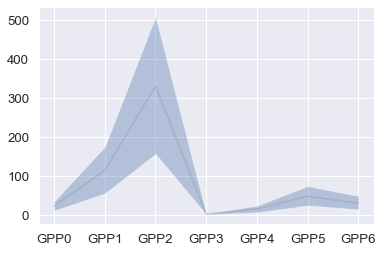

In [48]:
df_model_EML.iloc[0:-1,:].mean().plot(logy=False,legend=False,color='grey',alpha=0.25)
plt.fill_between(range(n), df_model_EML.iloc[0:-1,:].min(), df_model_EML.iloc[0:-1,:].max(), alpha=0.35)

In [45]:
gpp_param_EML

,cmax,cmax.1,cmax.2,cmax.3,cmax.4,cmax.5,cmax.6
0,28.859824,249.522861,529.757395,3.515707,15.744447,49.199589,23.997595
1,45.083813,189.391782,519.471208,1.665870,35.277836,99.933198,30.630582
2,22.500224,117.545576,345.824164,3.279221,22.366680,59.342186,47.809674
3,21.103297,136.248880,372.535593,3.059424,30.844223,52.475534,43.612081
4,36.049681,93.989471,476.244286,2.145677,13.561238,108.666415,63.022177
...,...,...,...,...,...,...,...
995,20.673320,230.919374,370.738089,3.713503,23.299594,52.419733,47.372524
996,18.502541,157.094903,450.044424,2.995350,29.968132,99.594372,54.663452
997,17.780827,119.390149,445.741229,4.591431,32.038963,100.690088,34.537952
998,30.671781,166.961423,282.669781,1.699418,34.725670,55.553444,31.817803


In [109]:
# EML
sa_folder = 'sa_nmaxkrbcfallnfall_EML21_090_AK-2/'
[df_param_EML,df_model_EML]=read_samples_resutls(path_EML+sa_folder+samples,
                                                 path_EML+sa_folder+results)
output_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6',
               'VEGC00','VEGC10','VEGC20',
               'VEGC01','VEGC11','VEGC21', 
               'VEGC02','VEGC22','VEGC03','VEGC23','VEGC04','VEGC05','VEGC06',
               'VEGN00','VEGN10','VEGN20',
               'VEGN01','VEGN11','VEGN21', 
               'VEGN02','VEGN22','VEGN03','VEGN23','VEGN04','VEGN05','VEGN06']

df_model_EML.columns = output_name
df_model_EML.head()

#xparams_EML, ymodel_EML =  ut.get_best_match(df_param_EML,df_model_EML)

param_name = ['nmax0','nmax1','nmax2','nmax3','nmax4','nmax5','nmax6',
              'krb00','krb01','krb02','krb03','krb04','krb05','krb06',
              'krb10','krb11',
              'krb20','krb21','krb22','krb23',
              'cfall00','cfall01','cfall02','cfall03','cfall04','cfall05','cfall06',
              'cfall10','cfall11',
              'cfall20','cfall21','cfall22','cfall23',
              'nfall00','nfall01','nfall02','nfall03','nfall04','nfall05','nfall06',
              'nfall10','nfall11',
              'nfall20','nfall21','nfall22','nfall23']

df_param_EML.columns = param_name
cfall_param_EML = df_param_EML.iloc[:,20:33].copy()
nfall_param_EML = df_param_EML.iloc[:,33:].copy()

vegc_model_EML = df_model_EML.iloc[:,7:20].copy()
vegn_model_EML = df_model_EML.iloc[:,20:].copy()

#cfall_EML, vegc_EML =  ut.get_best_match(cfall_param_EML,vegc_model_EML)
#nfall_EML, vegn_EML =  ut.get_best_match(nfall_param_EML,vegn_model_EML)


In [110]:
#VEGC
sa_folder = 'sa_nmaxkrbcfallnfall_MD3_090_AK/'
df_param_MD3 = pd.read_csv(path_MD3+sa_folder+samples)
df_model_MD3 = pd.read_csv(path_MD3+sa_folder+results_new,header=None)

output_name_MD3 = ['NPP0','NPP1','NPP2','NPP3',
                'VEGC00','VEGC10','VEGC20',
                'VEGC01','VEGC11','VEGC21',
                'VEGC02','VEGC12','VEGC22','VEGC03',
                'VEGN00','VEGN10','VEGN20',
                'VEGN01','VEGN11','VEGN21',
                'VEGN02','VEGN12','VEGN22','VEGN03']
df_model_MD3.columns = output_name_MD3
vegc_model_MD3 = df_model_MD3.iloc[:,4:14].copy()
vegn_model_MD3 = df_model_MD3.iloc[:,14:].copy()

param_name = ['nmax0','nmax1','nmax2','nmax3','nmax4','nmax5','nmax6',
              'krb00','krb01','krb02',
              'krb10','krb11',
              'krb20','krb21','krb22',
              'cfall00','cfall01','cfall02',
              'cfall10','cfall11',
              'cfall20','cfall21','cfall22',
              'nfall00','nfall01','nfall02',
              'nfall10','nfall11',
              'nfall20','nfall21','nfall22']

krb_param_MD3 = df_param_MD3.iloc[:,4:14].copy()
cfall_param_MD3 = df_param_MD3.iloc[:,14:24].copy()
nfall_param_MD3 = df_param_MD3.iloc[:,24:].copy()
nfall_param_MD3.head()

,nfall(0),nfall(0).1,nfall(0).2,nfall(1),nfall(1).1,nfall(1).2,nfall(2),nfall(2).1,nfall(2).2
0,0.010130,0.042373,0.003675,0.001026,0.001166,0.001469,0.013129,0.003256,0.001737
1,0.004980,0.005079,0.005485,0.000800,0.000588,0.012734,0.008164,0.004845,0.008615
2,0.003468,0.038748,0.011755,0.001110,0.001488,0.007911,0.011450,0.006957,0.001166
3,0.003279,0.014288,0.006950,0.001572,0.001649,0.000900,0.011213,0.006811,0.003998
4,0.014408,0.041186,0.004222,0.001411,0.000762,0.009905,0.013644,0.008515,0.002100


In [174]:
ls /Users/EJafarov/Downloads/cfall_vegc-md1

out_cfall_vegc-md1.csv    param_cfall_vagc-md1.csv


In [193]:
#Load GPP data from four sites 
def read_samples_resutls1(paths,pathr):
    df_param = pd.read_csv(paths,header=None)
    df_model = pd.read_csv(pathr,header=None)
    return [df_param,df_model]
#VEGC
params='param_cfall_vagc-md1.csv'
model='out_cfall_vegc-md1.csv'
params='param_cfall_vagc_noparlog-md1.csv'
model='out_cfall_vegc_noparlog-md1.csv'
ca_folder = '/Users/EJafarov/Downloads/cfall_vegc-md1-noparlog/' #10% variance
[df_param_MD1,df_model_MD1]=read_samples_resutls1(ca_folder+params,
                                                 ca_folder+model)

param_name_MD1 = [
              'cfall00','cfall01','cfall02',
              'cfall10','cfall11','cfall12',
              'cfall20','cfall21','cfall22','cfall23']

df_param_MD1.columns = param_name_MD1

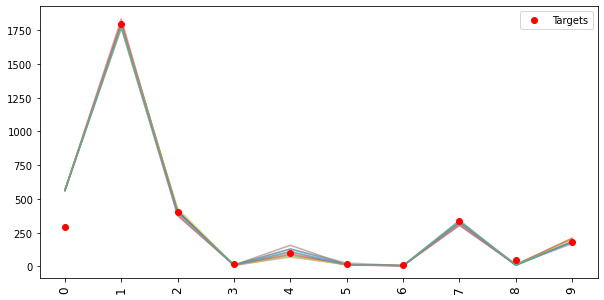

In [194]:
#df_model_MD1.plot()
ut.spaghetti_match_plot(df_param_MD1,df_model_MD1)

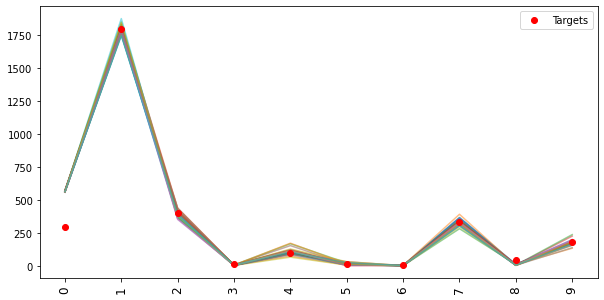

In [187]:
#df_model_MD1.plot()
ut.spaghetti_match_plot(df_param_MD1,df_model_MD1)

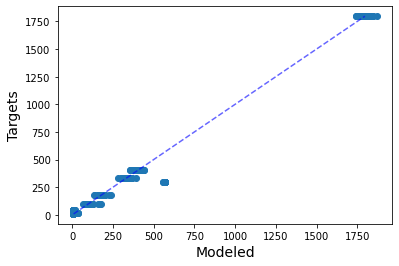

In [188]:
ut.one_to_one_match_plot(df_model_MD1)

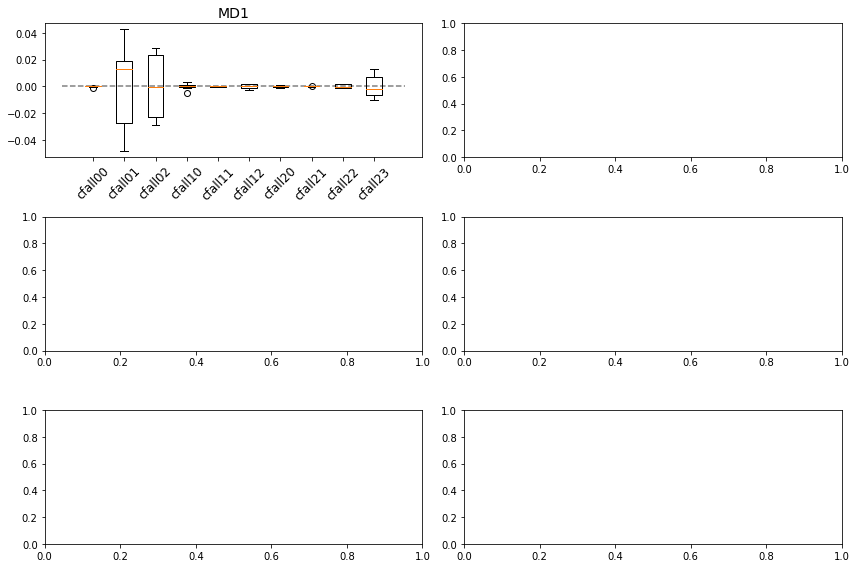

In [191]:
dict_of_dfs = {
    #'EML': [cfall_param_EML, vegc_model_EML],
    #'MD3': [cfall_param_MD3, vegc_model_MD3], #[npp_param_MD3,npp_model_MD3],
    'MD1': [df_param_MD1,df_model_MD1]
    #'CPF': [cfall_param_USPrr,vegc_model_USPrr],
    #'TK': [cfall_param_TK,vegc_model_TK],
    #'empty': []
}

plot_model_param_data(dict_of_dfs)

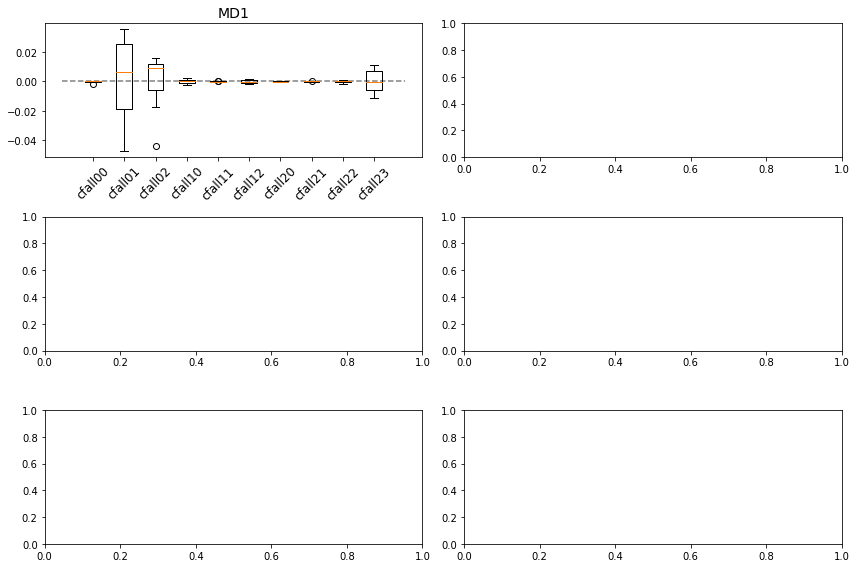

In [195]:
dict_of_dfs = {
    #'EML': [cfall_param_EML, vegc_model_EML],
    #'MD3': [cfall_param_MD3, vegc_model_MD3], #[npp_param_MD3,npp_model_MD3],
    'MD1': [df_param_MD1,df_model_MD1]
    #'CPF': [cfall_param_USPrr,vegc_model_USPrr],
    #'TK': [cfall_param_TK,vegc_model_TK],
    #'empty': []
}

plot_model_param_data(dict_of_dfs)

In [166]:
#Load GPP data from four sites 
def read_samples_resutls1(paths,pathr):
    df_param = pd.read_csv(paths,header=None)
    df_model = pd.read_csv(pathr,header=None)
    return [df_param,df_model]
#VEGC
params='param_step3-md1.csv'
model='out_step3-md1.csv'
ca_folder = 'calib-step3-md1/' #10% variance
[df_param_MD1,df_model_MD1]=read_samples_resutls1(path_MD1+ca_folder+params,
                                                 path_MD1+ca_folder+model)
df_param_MD1
#df_model_MD1

,0,1,2,3,4,5,6,7,8,9
0,0.011718,0.043478,0.017607,0.002935,0.000539,0.000392,0.001851,0.003463,0.006444,0.002562
1,0.004317,0.011687,0.011931,0.002973,0.001007,0.000295,0.006197,0.013232,0.006174,0.003811
2,0.010821,0.011743,0.026088,0.015319,0.000278,0.000582,0.001650,0.007852,0.003843,0.008304
3,0.003757,0.048491,0.037386,0.003061,0.000259,0.000250,0.003477,0.007739,0.011358,0.006019
4,0.004416,0.017289,0.016159,0.002963,0.001724,0.000307,0.007508,0.010482,0.003405,0.004623
5,0.008039,0.012011,0.010106,0.003172,0.000292,0.001425,0.002602,0.006452,0.002848,0.007510
6,0.013554,0.040076,0.020345,0.007841,0.000459,0.000827,0.001713,0.014611,0.006047,0.011077
7,0.006741,0.011153,0.018447,0.002875,0.001066,0.000538,0.003452,0.004802,0.009705,0.002269
8,0.003235,0.013987,0.023863,0.015604,0.000362,0.000366,0.002920,0.003818,0.007070,0.006443
9,0.003652,0.011839,0.009790,0.008045,0.000333,0.000264,0.003094,0.004431,0.006616,0.006488


In [ ]:
ut.one_to_one_match_plot(df_model)

In [167]:
sa_folder = 'SA-STEP2-MD1-VEGC-cfall-075/'
[df_param_MD1,df_model_MD1]=read_samples_resutls(path_MD1+sa_folder+samples,
                                                 path_MD1+sa_folder+'results.csv')
model_name_MD1 = ['NPP0','NPP1','NPP2','NPP3',
              'VEGC00','VEGC10','VEGC20',
              'VEGC01','VEGC11','VEGC21',
              'VEGC02','VEGC12','VEGC22','VEGC03']
df_model_MD1.columns = model_name_MD1
vegc_model_MD1 = df_model_MD1.iloc[:,4:14].copy()
vegc_model_MD1

param_name_MD1 = [
              'cfall00','cfall01','cfall02',
              'cfall10','cfall11','cfall12',
              'cfall20','cfall21','cfall22','cfall23']

df_param_MD1.columns = param_name_MD1
cfall_param_MD1 = df_param_MD1.copy()
cfall_param_MD1

xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param_MD1,df_model_MD1)
rmetric='r2rmse'
nelem=10
order=True
y=ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem]
x=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:nelem]
x

,cfall00,cfall01,cfall02,cfall10,cfall11,cfall12,cfall20,cfall21,cfall22,cfall23,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
256,0.001107,0.050722,0.024987,0.019928,0.003407,0.004790,0.003590,0.005149,0.001171,0.026025,0.971681,6457.652754,0.734040,0.818273,0.071513,0.458332
430,0.002410,0.112996,0.066896,0.013677,0.003747,0.001282,0.002478,0.006290,0.004697,0.011211,0.969132,6388.345722,0.738578,0.814327,0.071922,0.461160
44,0.002897,0.108955,0.055609,0.018663,0.003355,0.003993,0.004867,0.007544,0.003169,0.021438,0.968162,6504.811243,0.781520,0.795933,0.073409,0.487559
408,0.002398,0.020730,0.026428,0.017290,0.003438,0.003300,0.004699,0.007781,0.001555,0.027049,0.968382,6626.716056,0.831368,0.775999,0.074435,0.518120
8,0.000814,0.033821,0.085420,0.012929,0.004183,0.000994,0.002666,0.005945,0.001238,0.009208,0.966587,6901.941076,0.600612,0.862935,0.077732,0.378495
397,0.002047,0.067849,0.052519,0.016679,0.003217,0.005117,0.002847,0.005036,0.003907,0.008196,0.970201,7114.677349,0.509366,0.901070,0.078244,0.323748
328,0.002257,0.098000,0.032632,0.019981,0.003192,0.005518,0.006488,0.006377,0.003369,0.031280,0.967118,6998.811098,0.924941,0.736124,0.078398,0.575818
82,0.002214,0.039116,0.050972,0.007194,0.003674,0.003273,0.006206,0.005503,0.002910,0.014115,0.967000,7116.496731,0.598905,0.862849,0.079535,0.377840
425,0.001631,0.052311,0.066899,0.023174,0.003176,0.001190,0.005564,0.006635,0.003893,0.023560,0.967488,7327.464227,0.884316,0.750591,0.081296,0.551426
38,0.001245,0.109078,0.066071,0.017449,0.003312,0.001194,0.003161,0.007623,0.002907,0.026358,0.968359,7466.587744,0.920074,0.736724,0.082255,0.573385


In [170]:
x.describe()

,cfall00,cfall01,cfall02,cfall10,cfall11,cfall12,cfall20,cfall21,cfall22,cfall23,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.001902,0.069358,0.052843,0.016696,0.003470,0.003065,0.004257,0.006388,0.002882,0.019844,0.968411,6890.350400,0.752372,0.805483,0.076874,0.470588
std,0.000672,0.035044,0.019790,0.004492,0.000316,0.001784,0.001505,0.001012,0.001206,0.008405,0.001575,379.159926,0.144747,0.057235,0.003826,0.087944
min,0.000814,0.020730,0.024987,0.007194,0.003176,0.000994,0.002478,0.005036,0.001171,0.008196,0.966587,6388.345722,0.509366,0.736124,0.071513,0.323748
25%,0.001341,0.042017,0.037217,0.014427,0.003240,0.001216,0.002925,0.005614,0.001893,0.011937,0.967211,6535.287446,0.633969,0.756943,0.073666,0.398454
50%,0.002131,0.060080,0.054064,0.017370,0.003381,0.003287,0.004145,0.006333,0.003040,0.022499,0.968261,6950.376087,0.760049,0.805130,0.077988,0.474360
75%,0.002363,0.106217,0.066689,0.019612,0.003615,0.004591,0.005389,0.007317,0.003762,0.026274,0.968945,7116.041885,0.871079,0.851705,0.079251,0.543100
max,0.002897,0.112996,0.085420,0.023174,0.004183,0.005518,0.006488,0.007781,0.004697,0.031280,0.971681,7466.587744,0.924941,0.901070,0.082255,0.575818


In [169]:
y

,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,VEGC02,VEGC12,VEGC22,VEGC03,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
256,113.470482,11.422584,19.445503,33.242303,570.273535,1862.315149,468.026669,8.746897,97.847466,32.618529,5.954688,352.954846,5.785126,139.732481,0.971681,6457.652754,0.734040,0.818273,0.071513,0.458332
430,125.601512,11.144278,17.368642,29.033180,565.626630,1767.934485,391.661212,6.063814,112.179401,4.700269,4.404124,443.800970,8.464624,177.672577,0.969132,6388.345722,0.738578,0.814327,0.071922,0.461160
44,118.435888,13.213770,20.347643,32.529589,561.351367,1770.388293,302.241473,6.518763,77.368235,9.933806,4.794120,272.294144,6.448360,146.001192,0.968162,6504.811243,0.781520,0.795933,0.073409,0.487559
408,119.573079,8.754284,17.994286,31.778167,564.374451,1801.925684,303.467648,10.075101,143.187059,28.627679,5.433110,272.229788,5.199994,153.914882,0.968382,6626.716056,0.831368,0.775999,0.074435,0.518120
8,126.861057,6.119778,18.332536,28.374020,572.159778,1769.817419,450.775531,9.106431,181.962459,20.604461,4.039966,420.473279,9.631698,183.652032,0.966587,6901.941076,0.600612,0.862935,0.077732,0.378495
397,115.963676,12.541445,17.225570,31.306241,569.529077,1902.862842,468.303912,7.613404,89.502330,11.507674,4.718743,402.980774,10.387917,157.167122,0.970201,7114.677349,0.509366,0.901070,0.078244,0.323748
328,111.132481,13.591584,20.168843,32.997979,565.934332,1803.743042,349.988934,6.760937,69.617152,10.931789,5.409860,212.658138,5.027934,138.411380,0.967118,6998.811098,0.924941,0.736124,0.078398,0.575818
82,122.490185,9.587349,20.988619,20.540775,566.575409,1815.818823,451.145523,8.958082,127.166823,15.054534,4.851388,207.816951,8.716049,241.692383,0.967000,7116.496731,0.598905,0.862849,0.079535,0.377840
425,109.339198,8.033851,21.138982,34.836997,569.022998,1864.376355,346.104071,8.612990,156.698103,7.414376,4.517379,239.092053,6.071897,126.121101,0.967488,7327.464227,0.884316,0.750591,0.081296,0.551426
38,113.833808,11.119536,20.034639,31.759091,570.332153,1902.559509,317.649463,6.369668,111.113319,6.895369,4.503648,404.474377,5.393396,152.437582,0.968359,7466.587744,0.920074,0.736724,0.082255,0.573385


In [156]:
#VEGC
# NOTE: SA-MD1-STEP2 has only nmax and krb (NO cfall)
sa_folder = 'SA-STEP2-MD1-VEGC-cfall-075/'
[df_param_MD1,df_model_MD1]=read_samples_resutls(path_MD1+sa_folder+samples,
                                                 path_MD1+sa_folder+'results.csv')
model_name_MD1 = ['NPP0','NPP1','NPP2','NPP3',
              'VEGC00','VEGC10','VEGC20',
              'VEGC01','VEGC11','VEGC21',
              'VEGC02','VEGC12','VEGC22','VEGC03']
df_model_MD1.columns = model_name_MD1
vegc_model_MD1 = df_model_MD1.iloc[:,4:14].copy()
vegc_model_MD1

param_name_MD1 = [
              'cfall00','cfall01','cfall02',
              'cfall10','cfall11','cfall12',
              'cfall20','cfall21','cfall22','cfall23']

df_param_MD1.columns = param_name_MD1
cfall_param_MD1 = df_param_MD1.copy()
cfall_param_MD1


sa_folder = 'SA-STEP3-MD1-NPPVEGCVEGN-nfall-075/'
[df_param_MD1,df_model_MD1]=read_samples_resutls(path_MD1+sa_folder+samples,
                                                 path_MD1+sa_folder+'results.csv')

output_name_MD1 = ['NPP0','NPP1','NPP2','NPP3',
                'VEGC00','VEGC10','VEGC20',
                'VEGC01','VEGC11','VEGC21',
                'VEGC02','VEGC12','VEGC22','VEGC03',
                'VEGN00','VEGN10','VEGN20',
                'VEGN01','VEGN11','VEGN21',
                'VEGN02','VEGN12','VEGN22','VEGN03']
df_model_MD1.columns = output_name_MD1
#vegc_model_MD1 = df_model_MD1.iloc[:,4:14].copy()
vegn_model_MD1 = df_model_MD1.iloc[:,14:].copy()

param_name_MD1 = [
              'nfall00','nfall01','nfall02',
              'nfall10','nfall11','nfall12',
              'nfall20','nfall21','nfall22','nfall23']
df_param_MD1.columns = param_name_MD1
nfall_param_MD1 = df_param_MD1.copy()
nfall_param_MD1.head()


,nfall00,nfall01,nfall02,nfall10,nfall11,nfall12,nfall20,nfall21,nfall22,nfall23
0,0.009007,0.013990,0.014637,0.012316,0.001187,0.001215,0.004241,0.004785,0.007811,0.007928
1,0.010242,0.044555,0.017748,0.007250,0.001343,0.001424,0.005220,0.003280,0.007283,0.007607
2,0.006928,0.018592,0.023800,0.003562,0.001368,0.000320,0.006475,0.011121,0.006102,0.003047
3,0.012092,0.013575,0.013327,0.003062,0.001173,0.001032,0.003916,0.013458,0.004666,0.012766
4,0.007789,0.045148,0.045290,0.003283,0.000291,0.000491,0.009049,0.012385,0.012992,0.013243


In [134]:
sa_folder = 'sa-cfall-NPPVEGCN-TK-EJ-075/'
[df_param_TK,df_model_TK]=read_samples_resutls(path_TK+sa_folder+samples,
                                               path_TK+sa_folder+'results.csv')
model_name_TK = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7', \
              'VEGC00','VEGC10','VEGC20', 
              'VEGC01','VEGC11','VEGC21',
              'VEGC02','VEGC12','VEGC22',
              'VEGC03','VEGC23','VEGC04','VEGC24','VEGC05','VEGC06','VEGC07',
              'VEGN00','VEGN10','VEGN20', 
              'VEGN01','VEGN11','VEGN21',
              'VEGN02','VEGN12','VEGN22',
              'VEGN03','VEGN23','VEGN04','VEGN24','VEGN05','VEGN06','VEGN07']
df_model_TK.columns = model_name_TK
vegc_model_TK = df_model_TK.iloc[:,8:24].copy()


param_name_TK = [
              'cfall00','cfall01','cfall02','cfall03','cfall04','cfall05','cfall06','cfall07',
              'cfall10','cfall11','cfall12',
              'cfall20','cfall21','cfall22','cfall23','cfall24']

df_param_TK.columns = param_name_TK
cfall_param_TK = df_param_TK.copy()
cfall_param_TK


,cfall00,cfall01,cfall02,cfall03,cfall04,cfall05,cfall06,cfall07,cfall10,cfall11,cfall12,cfall20,cfall21,cfall22,cfall23,cfall24
0,0.048286,0.147348,0.109853,0.048468,0.024985,0.008143,0.023300,0.002578,0.000029,0.000112,0.000121,0.000047,0.000169,0.000261,0.000155,0.000256
1,0.063666,0.061534,0.082946,0.081727,0.077068,0.009059,0.018894,0.004954,0.000034,0.000075,0.000180,0.000080,0.000114,0.000177,0.000598,0.000500
2,0.044096,0.090233,0.030659,0.074201,0.033711,0.003604,0.017351,0.004523,0.000076,0.000097,0.000087,0.000016,0.000055,0.000135,0.000528,0.000349
3,0.020880,0.153220,0.099945,0.032781,0.025711,0.012087,0.005027,0.008258,0.000013,0.000248,0.000189,0.000046,0.000259,0.000075,0.000539,0.000433
4,0.041154,0.044189,0.043675,0.041956,0.036398,0.009253,0.007786,0.009187,0.000080,0.000219,0.000293,0.000064,0.000079,0.000209,0.000279,0.000103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.032932,0.025768,0.059553,0.090923,0.029793,0.008005,0.013574,0.004332,0.000015,0.000137,0.000194,0.000052,0.000305,0.000298,0.000149,0.000411
496,0.052004,0.063260,0.115457,0.040560,0.019898,0.010333,0.014909,0.005748,0.000074,0.000211,0.000199,0.000025,0.000215,0.000171,0.000118,0.000384
497,0.071170,0.147066,0.086569,0.130504,0.038717,0.002335,0.024229,0.003499,0.000072,0.000127,0.000214,0.000026,0.000319,0.000104,0.000119,0.000370
498,0.064353,0.090700,0.103746,0.073528,0.027838,0.008663,0.008307,0.006043,0.000052,0.000244,0.000254,0.000013,0.000102,0.000083,0.000294,0.000158


In [144]:
sa_folder = 'STEP3-nmax_krb_cfall_nfall-NPP_vegc_vegn/'
[df_param_USPrr,df_model_USPrr]=read_samples_resutls(path_USPrr+sa_folder+samples,
                                                     path_USPrr+sa_folder+'results.csv')
output_name_USPrr = ['NPP0','NPP1','NPP2','NPP3','NPP4',\
                     'VEGC00','VEGC10','VEGC20',\
                     'VEGC01',\
                     'VEGC02','VEGC12','VEGC22',\
                     'VEGC03','VEGC23',\
                     'VEGC04',
                     'VEGN00','VEGN10','VEGN20',\
                     'VEGN01',\
                     'VEGN02','VEGN12','VEGN22',\
                     'VEGN03','VEGN23',\
                     'VEGN04']

df_model_USPrr.columns = output_name_USPrr
df_model_USPrr

df_param_USPrr
vegc_model_USPrr = df_model_USPrr.iloc[:,5:15].copy()
vegc_model_USPrr

param_name_USPrr = [
              'cfall00','cfall01','cfall02','cfall03','cfall04',
              'cfall10','cfall11',
              'cfall20','cfall21','cfall22']

cfall_param_USPrr = df_param_USPrr.iloc[:,15:25].copy()
cfall_param_USPrr.columns = param_name_USPrr
cfall_param_USPrr

,cfall00,cfall01,cfall02,cfall03,cfall04,cfall10,cfall11,cfall20,cfall21,cfall22
0,0.188245,0.147870,0.108225,0.186524,0.095693,0.112246,0.119224,0.082002,0.167698,0.037043
1,0.082336,0.021574,0.078689,0.146790,0.184258,0.050343,0.071054,0.030801,0.138148,0.192038
2,0.053072,0.130467,0.111807,0.072489,0.128301,0.054252,0.158968,0.045871,0.031776,0.156490
3,0.006592,0.121595,0.189820,0.197945,0.096838,0.093622,0.128996,0.111131,0.126821,0.174801
4,0.141883,0.012291,0.183788,0.016224,0.182847,0.098167,0.089624,0.194662,0.198077,0.130039
...,...,...,...,...,...,...,...,...,...,...
495,0.151521,0.061979,0.143745,0.039068,0.081635,0.161220,0.122390,0.165084,0.050948,0.149952
496,0.078155,0.011406,0.021357,0.055217,0.044002,0.174798,0.197272,0.163337,0.145972,0.117729
497,0.124678,0.093709,0.125744,0.135595,0.123890,0.058813,0.167393,0.110342,0.097975,0.197413
498,0.044176,0.081574,0.086790,0.146735,0.123683,0.017181,0.061547,0.094615,0.147349,0.148716


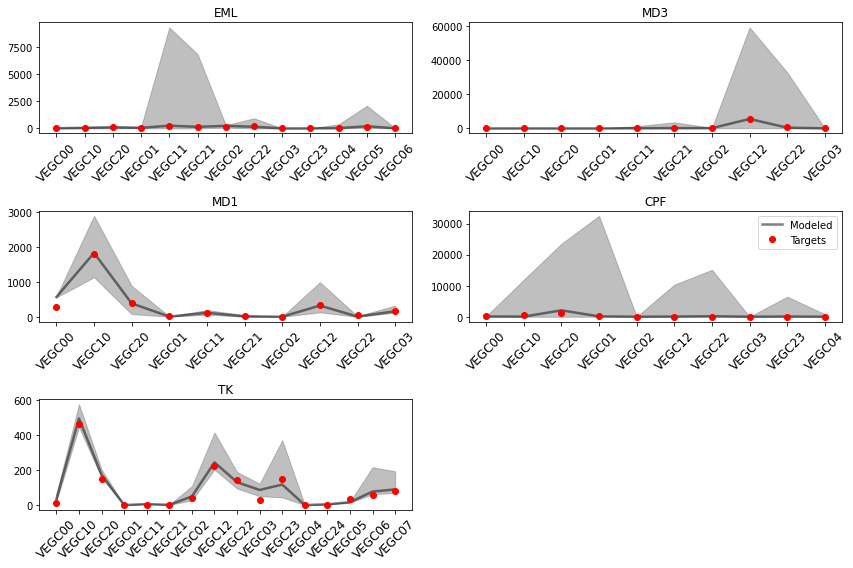

In [145]:
dict_of_dfs = {
    'EML': [cfall_param_EML, vegc_model_EML],
    'MD3': [cfall_param_MD3, vegc_model_MD3], #[npp_param_MD3,npp_model_MD3],
    'MD1': [cfall_param_MD1, vegc_model_MD1],
    'CPF': [cfall_param_USPrr,vegc_model_USPrr],
    'TK': [cfall_param_TK,vegc_model_TK],
    'empty': []
}

plot_model_target_data(dict_of_dfs)

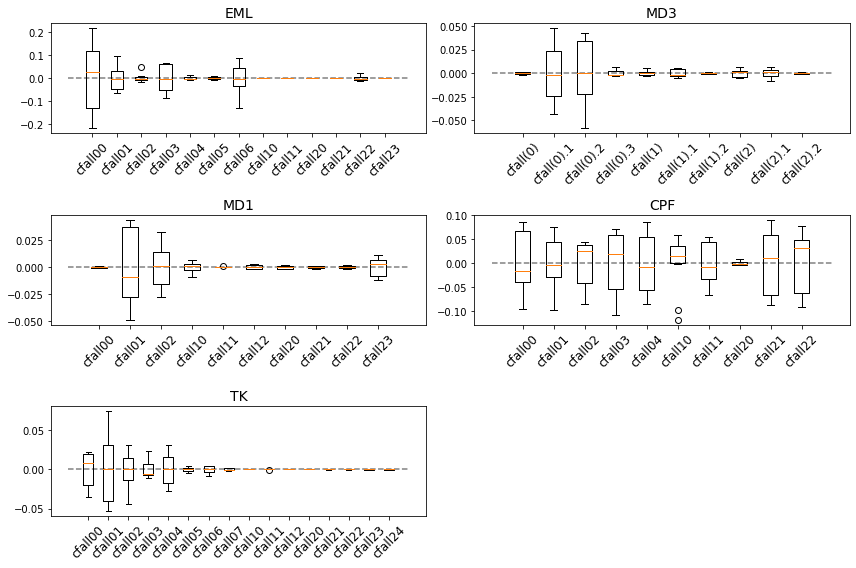

In [146]:
dict_of_dfs = {
    'EML': [cfall_param_EML, vegc_model_EML],
    'MD3': [cfall_param_MD3, vegc_model_MD3], #[npp_param_MD3,npp_model_MD3],
    'MD1': [cfall_param_MD1, vegc_model_MD1],
    'CPF': [cfall_param_USPrr,vegc_model_USPrr],
    'TK': [cfall_param_TK,vegc_model_TK],
    'empty': []
}

plot_model_param_data(dict_of_dfs)

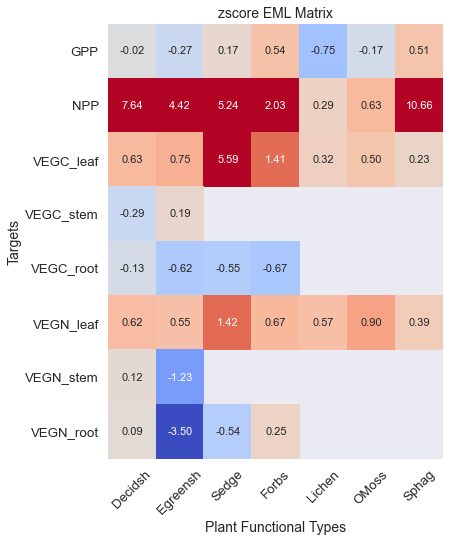

In [5]:
# Load EML21
rmetric='r2rmse'
nelem=10
order=True

def plot_EML(rmetric='r2rmse', nelem=10, order=True, metric='zscore', site=''):
    # metric: zscore, nmae_score
    #GPP
    sa_folder='sa_cmax_EML21_090_AK/'
    [df_param_EML,df_model_EML0]=read_samples_resutls(path_EML+sa_folder+samples,
                                                     path_EML+sa_folder+results)
    output_name = ['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6','NA','NA']
    df_model_EML0.columns = output_name
    df_model_EML=df_model_EML0.iloc[:,:-2].copy()
    xparams_EML, ymodel_EML =  ut.get_best_match(df_param_EML,df_model_EML)
    
    if metric == 'zscore':
        gpp_eml = z_score(ymodel_EML.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_EML)
    else:
        gpp_eml = nmae_score(ymodel_EML.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_EML)
        
    gpp_eml=get_by_index(gpp_eml,['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6'])
        

    # NPP
    sa_folder='sa_nmaxkrb_EML21_090_AK-2/'
    [df_param_EML,df_model_EML]=read_samples_resutls(path_EML+sa_folder+samples,
                                                     path_EML+sa_folder+results)
    output_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6',
                   'VEGC00','VEGC10','VEGC20',
                   'VEGC01','VEGC11','VEGC21', 
                   'VEGC02','VEGC22','VEGC03','VEGC23','VEGC04','VEGC05','VEGC06']
    df_model_EML.columns = output_name
    xparams_EML, ymodel_EML =  ut.get_best_match(df_param_EML,df_model_EML)

    if metric == 'zscore':
        npp_eml = z_score(ymodel_EML.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_EML)
    else:
        npp_eml = nmae_score(ymodel_EML.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_EML)
    
    npp_eml=get_by_index(npp_eml,['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6'])

    #VEGC
    sa_folder = 'sa_nmaxkrbcfallnfall_EML21_090_AK-2/'
    df_param_EML = pd.read_csv(path_EML+sa_folder+samples)
    df_model_EML = pd.read_csv(path_EML+sa_folder+results,header=None)

    output_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6',
                   'VEGC00','VEGC10','VEGC20',
                   'VEGC01','VEGC11','VEGC21', 
                   'VEGC02','VEGC22','VEGC03','VEGC23','VEGC04','VEGC05','VEGC06',
                   'VEGN00','VEGN10','VEGN20',
                   'VEGN01','VEGN11','VEGN21', 
                   'VEGN02','VEGN22','VEGN03','VEGN23','VEGN04','VEGN05','VEGN06']
    df_model_EML.columns = output_name

    xparams_EML, ymodel_EML =  ut.get_best_match(df_param_EML,df_model_EML)
    
    if metric == 'zscore':
        vegc_eml = z_score(ymodel_EML.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_EML)
    else:
        vegc_eml = nmae_score(ymodel_EML.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_EML)
    
    #z_eml = z_score(ymodel_EML.sort_values(by=[rmetric],ascending=order)[:nelem],df_model_EML)
    vegc_eml_leaf=get_by_index(vegc_eml,['VEGC00','VEGC01','VEGC02','VEGC03','VEGC04','VEGC05','VEGC06'])
    vegc_eml_stem=get_by_index(vegc_eml,['VEGC10','VEGC11'])
    vegc_eml_root=get_by_index(vegc_eml,['VEGC20','VEGC21','VEGC22','VEGC23',])

    #VEGN
    vegn_eml_leaf=get_by_index(vegc_eml,['VEGN00','VEGN01','VEGN02','VEGN03','VEGN04','VEGN05','VEGN06'])
    vegn_eml_stem=get_by_index(vegc_eml,['VEGN10','VEGN11'])
    vegn_eml_root=get_by_index(vegc_eml,['VEGN20','VEGN21','VEGN22','VEGN23',])

    #new
    z_eml_matrix = pd.DataFrame({
             'GPP': gpp_eml,
             'NPP': npp_eml,
             'VEGC_leaf': vegc_eml_leaf, 'VEGC_stem': vegc_eml_stem, 'VEGC_root': vegc_eml_root,
             'VEGN_leaf': vegn_eml_leaf, 'VEGN_stem': vegn_eml_stem, 'VEGN_root': vegn_eml_root
            })
    z_eml_matrix.index=['Decidsh', 'Egreensh', 'Sedge', 'Forbs', 'Lichen', 'OMoss', 'Sphag']
    
    site_metric_matrix(z_eml_matrix.T, metric+' '+site)
    
plot_EML(rmetric, nelem, order, metric='zscore', site='EML')

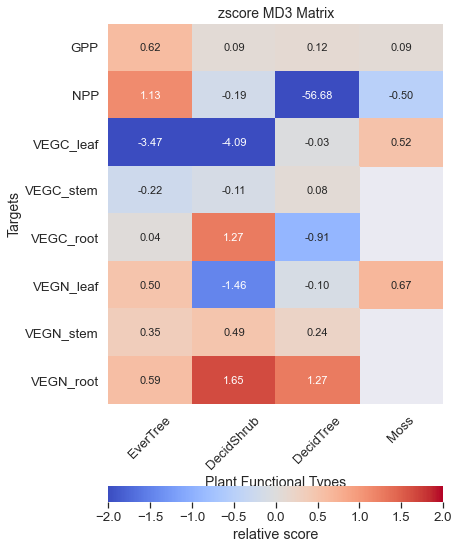

In [16]:
# Load MD3
def plot_MD3(rmetric='r2rmse', nelem=10, order=True, metric='zscore', site=''):
    # metric: zscore, nmae_score
    #GPP
    sa_folder = 'sa_cmax_MD3_050_AK/'
    [df_param_MD3,df_model_MD3]=read_samples_resutls(path_MD3+sa_folder+samples,
                                                     path_MD3+sa_folder+results)
    output_name_MD3 = ['GPP0','GPP1','GPP2','GPP3']
    df_model_MD3.columns = output_name_MD3
    xparams_MD3, ymodel_MD3 =  ut.get_best_match(df_param_MD3,df_model_MD3)

    #z_gpp_md3 = z_score(ymodel_MD3.sort_values(by=[rmetric],ascending=order)[:nelem],
    #                    df_model_MD3)

    if metric == 'zscore':
        gpp_md3 = z_score(ymodel_MD3.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_MD3)
    else:
        gpp_md3 = nmae_score(ymodel_MD3.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_MD3)
        
    gpp_md3=get_by_index(gpp_md3,['GPP0','GPP1','GPP2','GPP3'])

    # NPP
    sa_folder = 'sa_nmaxkrb_MD3_090_AK/'
    [df_param_MD3,df_model_MD3]=read_samples_resutls(path_MD3+sa_folder+samples,
                                                     path_MD3+sa_folder+results)
    output_name_MD3 = ['NPP0','NPP1','NPP2','NPP3',\
                       'VEGC00','VEGC10','VEGC20',\
                       'VEGC01','VEGC11','VEGC21',\
                       'VEGC02','VEGC12','VEGC22',\
                       'VEGC03'
                       ]
    df_model_MD3.columns = output_name_MD3
    xparams_MD3, ymodel_MD3 =  ut.get_best_match(df_param_MD3,df_model_MD3)
    #z_npp_md3 = z_score(ymodel_MD3.sort_values(by=[rmetric],ascending=order)[:nelem],df_model_MD3)
    if metric == 'zscore':
        npp_md3 = z_score(ymodel_MD3.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_MD3)
    else:
        npp_md3 = nmae_score(ymodel_MD3.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_MD3)
    
    npp_md3=get_by_index(npp_md3,['NPP0','NPP1','NPP2','NPP3'])

    #VEGC
    sa_folder = 'sa_nmaxkrbcfallnfall_MD3_090_AK/'
    df_param_MD3 = pd.read_csv(path_MD3+sa_folder+samples)
    df_model_MD3 = pd.read_csv(path_MD3+sa_folder+results_new,header=None)

    output_name_MD3 = ['NPP0','NPP1','NPP2','NPP3',
                    'VEGC00','VEGC10','VEGC20',
                    'VEGC01','VEGC11','VEGC21',
                    'VEGC02','VEGC12','VEGC22','VEGC03',
                    'VEGN00','VEGN10','VEGN20',
                    'VEGN01','VEGN11','VEGN21',
                    'VEGN02','VEGN12','VEGN22','VEGN03']
    df_model_MD3.columns = output_name_MD3
    xparams_MD3, ymodel_MD3 =  ut.get_best_match(df_param_MD3,df_model_MD3)
    
    if metric == 'zscore':
        vegc_md3 = z_score(ymodel_MD3.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_MD3)
    else:
        vegc_md3 = nmae_score(ymodel_MD3.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_MD3)

#    z_md3 = z_score(ymodel_MD3.sort_values(by=[rmetric],ascending=order)[:nelem],df_model_MD3)
    
    vegc_md3_leaf=get_by_index(vegc_md3,['VEGC00','VEGC01','VEGC02','VEGC03'])
    vegc_md3_stem=get_by_index(vegc_md3,['VEGC10','VEGC11','VEGC12'])
    vegc_md3_root=get_by_index(vegc_md3,['VEGC20','VEGC21','VEGC22'])

    #VEGN
    vegn_md3_leaf=get_by_index(vegc_md3,['VEGN00','VEGN01','VEGN02','VEGN03'])
    vegn_md3_stem=get_by_index(vegc_md3,['VEGN10','VEGN11','VEGN12'])
    vegn_md3_root=get_by_index(vegc_md3,['VEGN20','VEGN21','VEGN22'])

    #new
    z_md3_matrix = pd.DataFrame({
             'GPP': gpp_md3,
             'NPP': npp_md3,
             'VEGC_leaf': vegc_md3_leaf, 'VEGC_stem': vegc_md3_stem, 'VEGC_root': vegc_md3_root,
             'VEGN_leaf': vegn_md3_leaf, 'VEGN_stem': vegn_md3_stem, 'VEGN_root': vegn_md3_root
            })
    z_md3_matrix.index=['EverTree', 'DecidShrub', 'DecidTree', 'Moss']

    site_metric_matrix(z_md3_matrix.T, metric+' '+site)
    
plot_MD3(rmetric, nelem, order, metric='zscore', site='MD3')


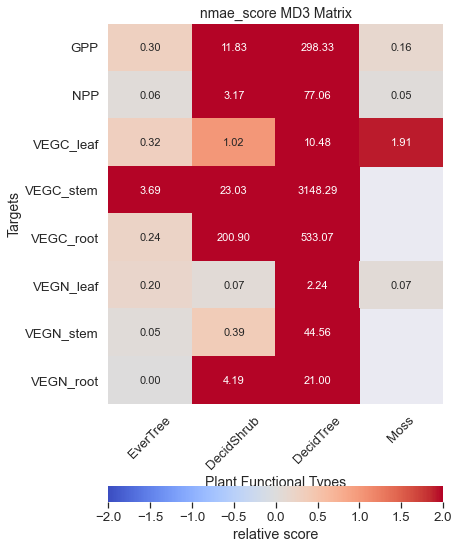

In [17]:
plot_MD3(rmetric='r2rmsemape', nelem=10, order=False, metric='nmae_score',site='MD3')

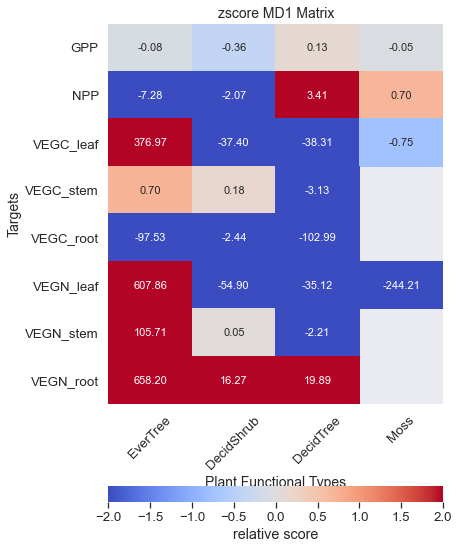

In [18]:
# Load MD1
def plot_MD1(rmetric='r2rmse', nelem=10, order=True, metric='zscore', site=''):
    # metric: zscore, nmae_score
    #GPP
    sa_folder = 'SA-MD1-STEP1/'

    [df_param_MD1,df_model_MD1]=read_samples_resutls(path_MD1+sa_folder+samples,
                                                     path_MD1+sa_folder+results)
    output_name_MD1 = ['GPP0','GPP1','GPP2','GPP3']
    df_model_MD1.columns = output_name_MD1
    xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param_MD1,df_model_MD1)

    if metric == 'zscore':
        gpp_md1 = z_score(ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_MD1)
    else:
        gpp_md1 = nmae_score(ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_MD1)
        
    gpp_md1=get_by_index(gpp_md1,['GPP0','GPP1','GPP2','GPP3'])

    # NPP
    sa_folder = 'SA-MD1-STEP2/'
    [df_param_MD1,df_model_MD1]=read_samples_resutls(path_MD1+sa_folder+samples,
                                                     path_MD1+sa_folder+'results.csv')
    output_name_MD1 = ['NPP0','NPP1','NPP2','NPP3',\
                       'VEGC00','VEGC10','VEGC20',\
                       'VEGC01','VEGC11','VEGC21',\
                       'VEGC02','VEGC12','VEGC22',\
                       'VEGC03'
                       ]
    df_model_MD1.columns = output_name_MD1
    xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param_MD1,df_model_MD1)

    if metric == 'zscore':
        npp_md1 = z_score(ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_MD1)
    else:
        npp_md1 = nmae_score(ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_MD1)
        
    npp_md1=get_by_index(npp_md1,['NPP0','NPP1','NPP2','NPP3'])

    #VEGC
    sa_folder = 'SA-MD1-STEP2/'
    [df_param_MD1,df_model_MD1]=read_samples_resutls(path_MD1+sa_folder+samples,
                                                     path_MD1+sa_folder+'results.csv')
    model_name = ['NPP0','NPP1','NPP2','NPP3',
                  'VEGC00','VEGC10','VEGC20',
                  'VEGC01','VEGC11','VEGC21',
                  'VEGC02','VEGC12','VEGC22','VEGC03']
    df_model_MD1.columns = model_name
    xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param_MD1,df_model_MD1)
    
    if metric == 'zscore':
        vegc_md1 = z_score(ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_MD1)
    else:
        vegc_md1 = nmae_score(ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_MD1)

    vegc_md1_leaf=get_by_index(vegc_md1,['VEGC00','VEGC01','VEGC02','VEGC03'])
    vegc_md1_stem=get_by_index(vegc_md1,['VEGC10','VEGC11','VEGC12'])
    vegc_md1_root=get_by_index(vegc_md1,['VEGC20','VEGC21','VEGC22'])


    #VEGN
    sa_folder = 'SA-STEP3-MD1-NPPVEGCVEGN-nfall-075/'
    [df_param_MD1,df_model_MD1]=read_samples_resutls(path_MD1+sa_folder+samples,
                                                     path_MD1+sa_folder+'results.csv')
    model_name = ['NPP0','NPP1','NPP2','NPP3',
                  'VEGC00','VEGC10','VEGC20',
                  'VEGC01','VEGC11','VEGC21',
                  'VEGC02','VEGC12','VEGC22','VEGC03',
                  'VEGN00','VEGN10','VEGN20',
                  'VEGN01','VEGN11','VEGN21',
                  'VEGN02','VEGN12','VEGN22','VEGN03',]
    df_model_MD1.columns = model_name
    xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param_MD1,df_model_MD1)
    
    if metric == 'zscore':
        vegc_md1 = z_score(ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_MD1)
    else:
        vegc_md1 = nmae_score(ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_MD1)    
    
    vegn_md1_leaf=get_by_index(vegc_md1,['VEGN00','VEGN01','VEGN02','VEGN03'])
    vegn_md1_stem=get_by_index(vegc_md1,['VEGN10','VEGN11','VEGN12'])
    vegn_md1_root=get_by_index(vegc_md1,['VEGN20','VEGN21','VEGN22'])

    #new
    z_md1_matrix = pd.DataFrame({
             'GPP': gpp_md1,
             'NPP': npp_md1,
             'VEGC_leaf': vegc_md1_leaf, 'VEGC_stem': vegc_md1_stem, 'VEGC_root': vegc_md1_root,
             'VEGN_leaf': vegn_md1_leaf, 'VEGN_stem': vegn_md1_stem, 'VEGN_root': vegn_md1_root
            })
    z_md1_matrix.index=['EverTree', 'DecidShrub', 'DecidTree', 'Moss']

    site_metric_matrix(z_md1_matrix.T, metric+' '+site)
    
plot_MD1(rmetric, nelem, order, metric='zscore', site='MD1')


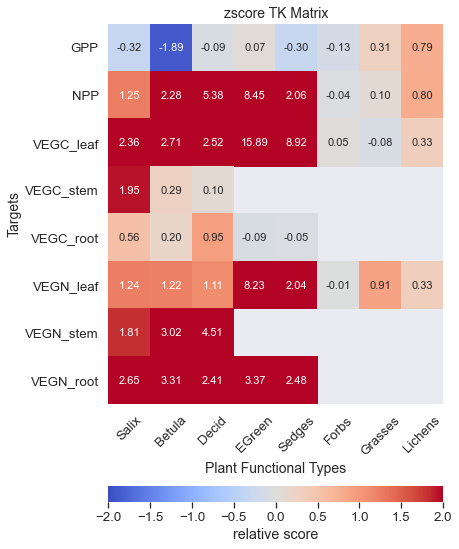

In [23]:
# Load TK1
def plot_TK(rmetric='r2rmse', nelem=10, order=True, metric='zscore', site=''):
    # metric: zscore, nmae_score
    #GPP
    sa_folder = 'sa-cmax-TK-075-EJ/'
    [df_param_TK,df_model_TK]=read_samples_resutls(path_TK+sa_folder+samples,
                                                   path_TK+sa_folder+'results.csv')
    output_name_TK = ['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6','GPP7']
    df_model_TK.columns = output_name_TK
    xparams_TK, ymodel_TK =  ut.get_best_match(df_param_TK,df_model_TK)

    if metric == 'zscore':
        gpp_tk = z_score(ymodel_TK.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_TK)
    else:
        gpp_tk = nmae_score(ymodel_TK.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_TK)
        
    gpp_tk=get_by_index(gpp_tk,['GPP0','GPP1','GPP2','GPP3','GPP4','GPP5','GPP6','GPP7'])
    
    # NPP
    sa_folder = 'sa-krb-NPPVEGC-TK-EJ-075/'
    [df_param_TK,df_model_TK]=read_samples_resutls(path_TK+sa_folder+samples,
                                                   path_TK+sa_folder+'results.csv')
    model_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7', \
                  'VEGC00','VEGC10','VEGC20', 
                  'VEGC01','VEGC11','VEGC21',
                  'VEGC02','VEGC12','VEGC22',
                  'VEGC03','VEGC23','VEGC04','VEGC24','VEGC05','VEGC06','VEGC07']
    df_model_TK.columns = model_name
    xparams_TK, ymodel_TK =  ut.get_best_match(df_param_TK,df_model_TK)
    
    if metric == 'zscore':
        npp_tk = z_score(ymodel_TK.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_TK)
    else:
        npp_tk = nmae_score(ymodel_TK.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_TK)    
     
    npp_tk=get_by_index(npp_tk,['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7'])    
    
    # VEGC
    sa_folder = 'sa-krb-NPPVEGC-TK-EJ-075/'
    [df_param_TK,df_model_TK]=read_samples_resutls(path_TK+sa_folder+samples,
                                                   path_TK+sa_folder+'results.csv')
    model_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7', \
                  'VEGC00','VEGC10','VEGC20', 
                  'VEGC01','VEGC11','VEGC21',
                  'VEGC02','VEGC12','VEGC22',
                  'VEGC03','VEGC23','VEGC04','VEGC24','VEGC05','VEGC06','VEGC07']
    df_model_TK.columns = model_name   
    
    xparams_TK, ymodel_TK =  ut.get_best_match(df_param_TK,df_model_TK)
    
    z_tk = z_score(ymodel_TK.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_TK)
    vegc_tk_leaf=get_by_index(z_tk,['VEGC00','VEGC01','VEGC02','VEGC03','VEGC04','VEGC05','VEGC06','VEGC07'])
    vegc_tk_stem=get_by_index(z_tk,['VEGC10','VEGC11','VEGC12'])
    vegc_tk_root=get_by_index(z_tk,['VEGC20','VEGC21','VEGC22','VEGC23','VEGC24'])
    
    #VEGN
    sa_folder = 'sa-cfall-NPPVEGCN-TK-EJ-075/'
    [df_param_TK,df_model_TK]=read_samples_resutls(path_TK+sa_folder+samples,
                                                   path_TK+sa_folder+'results.csv')
    model_name = ['NPP0','NPP1','NPP2','NPP3','NPP4','NPP5','NPP6','NPP7', \
                  'VEGC00','VEGC10','VEGC20', 
                  'VEGC01','VEGC11','VEGC21',
                  'VEGC02','VEGC12','VEGC22',
                  'VEGC03','VEGC23','VEGC04','VEGC24','VEGC05','VEGC06','VEGC07',
                  'VEGN00','VEGN10','VEGN20', 
                  'VEGN01','VEGN11','VEGN21',
                  'VEGN02','VEGN12','VEGN22',
                  'VEGN03','VEGN23','VEGN04','VEGN24','VEGN05','VEGN06','VEGN07']
    df_model_TK.columns = model_name
    xparams_TK, ymodel_TK =  ut.get_best_match(df_param_TK,df_model_TK)
    
    z_tk = z_score(ymodel_TK.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_TK)
    vegn_tk_leaf=get_by_index(z_tk,['VEGN00','VEGN01','VEGN02','VEGN03','VEGN04','VEGN05','VEGN06','VEGN07'])
    vegn_tk_stem=get_by_index(z_tk,['VEGN10','VEGN11','VEGN12'])
    vegn_tk_root=get_by_index(z_tk,['VEGN20','VEGN21','VEGN22','VEGN23','VEGN24'])
    
    #new
    z_tk_matrix = pd.DataFrame({
             'GPP': gpp_tk,
             'NPP': npp_tk,
             'VEGC_leaf': vegc_tk_leaf, 'VEGC_stem': vegc_tk_stem, 'VEGC_root': vegc_tk_root,
             'VEGN_leaf': vegn_tk_leaf, 'VEGN_stem': vegn_tk_stem, 'VEGN_root': vegn_tk_root
            })
    z_tk_matrix.index=['Salix', 'Betula', 'Decid', 'EGreen', 'Sedges', 'Forbs', 'Grasses', 'Lichens']

    site_metric_matrix(z_tk_matrix.T, metric+' '+site)
    
plot_TK(rmetric, nelem, order, metric='zscore', site='TK')

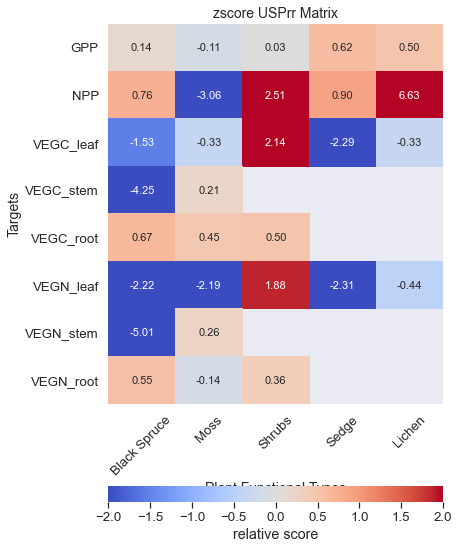

In [28]:
# Load US-Prr
def plot_USPrr(rmetric='r2rmse', nelem=10, order=True, metric='zscore', site=''):
    # metric: zscore, nmae_score
    #GPP

    sa_folder = 'STEP1-cmax-GPP/'
    [df_param_USPrr,df_model_USPrr]=read_samples_resutls(path_USPrr+sa_folder+samples,
                                                         path_USPrr+sa_folder+'results.csv')
    output_name_USPrr = ['GPP0','GPP1','GPP2','GPP3','GPP4']
    df_model_USPrr.columns = output_name_USPrr
    xparams_USPrr, ymodel_USPrr =  ut.get_best_match(df_param_USPrr,df_model_USPrr)
    
    if metric == 'zscore':
        gpp_USPrr = z_score(ymodel_USPrr.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_USPrr)
    else:
        gpp_USPrr = nmae_score(ymodel_USPrr.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_USPrr)

    gpp_USPrr=get_by_index(gpp_USPrr,['GPP0','GPP1','GPP2','GPP3','GPP4'])

    # NPP
    sa_folder = 'STEP2-nmax_krb-NPP_vegc/'
    [df_param_USPrr,df_model_USPrr]=read_samples_resutls(path_USPrr+sa_folder+samples,
                                                         path_USPrr+sa_folder+'results.csv')
    output_name_USPrr = ['NPP0','NPP1','NPP2','NPP3','NPP4',\
                         'VEGC00','VEGC10','VEGC20',\
                         'VEGC01',\
                         'VEGC02','VEGC12','VEGC22',\
                         'VEGC03','VEGC23',\
                         'VEGC04']

    df_model_USPrr.columns = output_name_USPrr
    xparams_USPrr, ymodel_USPrr =  ut.get_best_match(df_param_USPrr,df_model_USPrr)
    
    if metric == 'zscore':
        npp_USPrr = z_score(ymodel_USPrr.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_USPrr)
    else:
        npp_USPrr = nmae_score(ymodel_USPrr.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_USPrr)
    
    npp_USPrr=get_by_index(npp_USPrr,['NPP0','NPP1','NPP2','NPP3','NPP4'])
    
    
    # VEGC & N
    sa_folder = 'STEP3-nmax_krb_cfall_nfall-NPP_vegc_vegn/'
    [df_param_USPrr,df_model_USPrr]=read_samples_resutls(path_USPrr+sa_folder+samples,
                                                         path_USPrr+sa_folder+'results.csv')
    output_name_USPrr = ['NPP0','NPP1','NPP2','NPP3','NPP4',\
                         'VEGC00','VEGC10','VEGC20',\
                         'VEGC01',\
                         'VEGC02','VEGC12','VEGC22',\
                         'VEGC03','VEGC23',\
                         'VEGC04',
                         'VEGN00','VEGN10','VEGN20',\
                         'VEGN01',\
                         'VEGN02','VEGN12','VEGN22',\
                         'VEGN03','VEGN23',\
                         'VEGN04']

    df_model_USPrr.columns = output_name_USPrr
    xparams_USPrr, ymodel_USPrr =  ut.get_best_match(df_param_USPrr,df_model_USPrr)
    
    if metric == 'zscore':
        z_USPrr = z_score(ymodel_USPrr.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_USPrr)
    else:
        z_USPrr = nmae_score(ymodel_USPrr.sort_values(by=[rmetric],ascending=order)[:nelem],
                        df_model_USPrr)
    
    vegc_USPrr_leaf=get_by_index(z_USPrr,['VEGC00','VEGC01','VEGC02','VEGC03','VEGC04'])
    vegc_USPrr_stem=get_by_index(z_USPrr,['VEGC10','VEGC12',])
    vegc_USPrr_root=get_by_index(z_USPrr,['VEGC20','VEGC22','VEGC23',])

    vegn_USPrr_leaf=get_by_index(z_USPrr,['VEGN00','VEGN01','VEGN02','VEGN03','VEGN04'])
    vegn_USPrr_stem=get_by_index(z_USPrr,['VEGN10','VEGN12',])
    vegn_USPrr_root=get_by_index(z_USPrr,['VEGN20','VEGN22','VEGN23',])
    
    #new
    z_USPrr_matrix = pd.DataFrame({
             'GPP': gpp_USPrr,
             'NPP': npp_USPrr,
             'VEGC_leaf': vegc_USPrr_leaf, 'VEGC_stem': vegc_USPrr_stem, 'VEGC_root': vegc_USPrr_root,
             'VEGN_leaf': vegn_USPrr_leaf, 'VEGN_stem': vegn_USPrr_stem, 'VEGN_root': vegn_USPrr_root
            })
    z_USPrr_matrix.index=['Black Spruce', 'Moss', 'Shrubs', 'Sedge', 'Lichen']

    site_metric_matrix(z_USPrr_matrix.T,  metric+' '+site)

plot_USPrr(rmetric, nelem, order, metric='zscore', site='USPrr')

# soil parameters -> below-ground targets (new)

In [33]:
#Load EML21
per_number=0.5
sa_folder = 'sa_soil_EML21_090_AK-2/'
df_param_EML = pd.read_csv(path_EML+sa_folder+samples)
df_model_EML = pd.read_csv(path_EML+sa_folder+results,header=None)

output_name = ['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']
df_model_EML.columns = output_name

xparams_EML, ymodel_EML =  ut.get_best_match(df_param_EML,df_model_EML)

#Load MD3
sa_folder = 'sa_soil_MD3_090_AK/'
df_param_MD3 = pd.read_csv(path_MD3+sa_folder+samples)
df_model_MD3 = pd.read_csv(path_MD3+sa_folder+results,header=None)

df_model_MD3.columns = output_name

xparams_MD3, ymodel_MD3 =  ut.get_best_match(df_param_MD3,df_model_MD3)

#Load TK3
sa_folder = 'soilC-tk-EJ-095_case2/'
df_param_TK = pd.read_csv(path_TK+sa_folder+samples)
df_model_TK = pd.read_csv(path_TK+sa_folder+'results.csv',header=None)

df_model_TK.columns = output_name

xparams_TK, ymodel_TK =  ut.get_best_match(df_param_TK,df_model_TK)

#Load MD1
sa_folder = 'sa-step4-md1-soil-099-kdcsomcr-kdcsompr-fixed/'

[df_param_MD1,df_model_MD1]=read_samples_resutls(path_MD1+sa_folder+samples,
                                                 path_MD1+sa_folder+'results.csv')

output_name = ['NPP0','NPP1','NPP2','NPP3',
              'VEGC00','VEGC10','VEGC20',
              'VEGC01','VEGC11','VEGC21',
              'VEGC02','VEGC12','VEGC22','VEGC03',
              'VEGN00','VEGN10','VEGN20',
              'VEGN01','VEGN11','VEGN21',
              'VEGN02','VEGN12','VEGN22','VEGN03',
              'CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']

df_model_MD1.columns = output_name
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param_MD1,df_model_MD1)

# Load US-Prr
sa_folder = 'STEP4-soilC/'
[df_param_USPrr,df_model_USPrr]=read_samples_resutls(path_USPrr+sa_folder+samples,
                                                     path_USPrr+sa_folder+'results.csv')
output_name = ['CarbonShallow','CarbonDeep','CarbonMineralSum','OrganicNitrogenSum','AvailableNitrogenSum']
df_model_USPrr.columns = output_name

print(df_model_USPrr.isnull().values.any(),'have nans')
df_model_USPrr=df_model_USPrr.fillna(0)
xparams_USPrr, ymodel_USPrr =  ut.get_best_match(df_param_USPrr,df_model_USPrr)
xparams_USPrr

z_soil_tk = z_score(ymodel_TK.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_TK)
soil_tk=get_by_index(z_soil_tk,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])
z_soil_eml = z_score(ymodel_EML.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_EML)
soil_eml=get_by_index(z_soil_eml,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])
z_soil_md3 = z_score(ymodel_MD3.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_MD3)
soil_md3=get_by_index(z_soil_md3,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])
z_soil_md1 = z_score(ymodel_MD1.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_MD1)
soil_md1=get_by_index(z_soil_md1,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])
z_soil_USPrr = z_score(ymodel_USPrr.sort_values(by=[rmetric],ascending=True)[:nelem],df_model_USPrr)
soil_USPrr=get_by_index(z_soil_USPrr,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])

True have nans


# soil parameters -> below-ground targets

In [29]:
#Load EML21
per_number=0.5
sa_folder = 'sa_soil_EML21_090_AK-2/'
df_param_EML = pd.read_csv(path_EML+sa_folder+samples)
df_model_EML = pd.read_csv(path_EML+sa_folder+results,header=None)

output_name = ['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']
df_model_EML.columns = output_name

xparams_EML, ymodel_EML =  ut.get_params_r2_rmse(df_param_EML,df_model_EML,r2lim=per_number)

#Load MD3
sa_folder = 'sa_soil_MD3_090_AK/'
df_param_MD3 = pd.read_csv(path_MD3+sa_folder+samples)
df_model_MD3 = pd.read_csv(path_MD3+sa_folder+results,header=None)

df_model_MD3.columns = output_name

xparams_MD3, ymodel_MD3 =  ut.get_params_r2_rmse(df_param_MD3,df_model_MD3,r2lim=per_number)

#Load TK3
sa_folder = 'soilC-tk-EJ-095_case2/'
df_param_TK = pd.read_csv(path_TK+sa_folder+samples)
df_model_TK = pd.read_csv(path_TK+sa_folder+'results.csv',header=None)

df_model_TK.columns = output_name

xparams_TK, ymodel_TK =  ut.get_params_r2_rmse(df_param_TK,df_model_TK,r2lim=.45)

#Load MD1
sa_folder = 'sa-step4-md1-soil-099-kdcsomcr-kdcsompr-fixed/'

[df_param_MD1,df_model_MD1]=read_samples_resutls(path_MD1+sa_folder+samples,
                                                 path_MD1+sa_folder+'results.csv')

output_name = ['NPP0','NPP1','NPP2','NPP3',
              'VEGC00','VEGC10','VEGC20',
              'VEGC01','VEGC11','VEGC21',
              'VEGC02','VEGC12','VEGC22','VEGC03',
              'VEGN00','VEGN10','VEGN20',
              'VEGN01','VEGN11','VEGN21',
              'VEGN02','VEGN12','VEGN22','VEGN03',
              'CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']

df_model_MD1.columns = output_name
xparams_MD1, ymodel_MD1 =  ut.get_params_r2_rmse(df_param_MD1,df_model_MD1,r2lim=.98)

# Load US-Prr
sa_folder = 'STEP4-soilC/'
[df_param_USPrr,df_model_USPrr]=read_samples_resutls(path_USPrr+sa_folder+samples,
                                                     path_USPrr+sa_folder+'results.csv')
output_name = ['CarbonShallow','CarbonDeep','CarbonMineralSum','OrganicNitrogenSum','AvailableNitrogenSum']
df_model_USPrr.columns = output_name

print(df_model_USPrr.isnull().values.any(),'have nans')
df_model_USPrr=df_model_USPrr.fillna(0)
xparams_USPrr, ymodel_USPrr =  ut.get_params_r2_rmse(df_param_USPrr,df_model_USPrr,r2lim=0.94)
xparams_USPrr

z_soil_tk = z_score(ymodel_TK,df_model_TK)
soil_tk=get_by_index(z_soil_tk,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])
z_soil_eml = z_score(ymodel_EML,df_model_EML)
soil_eml=get_by_index(z_soil_eml,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])
z_soil_md3 = z_score(ymodel_MD3,df_model_MD3)
soil_md3=get_by_index(z_soil_md3,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])
z_soil_md1 = z_score(ymodel_MD1,df_model_MD1)
soil_md1=get_by_index(z_soil_md1,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])
z_soil_USPrr = z_score(ymodel_USPrr,df_model_USPrr)
soil_USPrr=get_by_index(z_soil_USPrr,['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum'])

True have nans


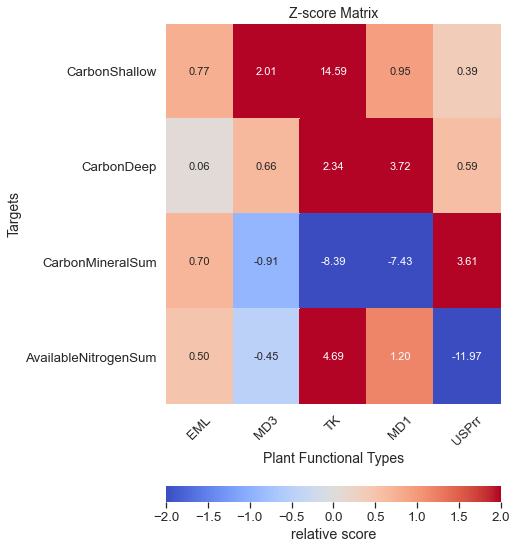

In [30]:
#new
z_matrix_soil = pd.DataFrame({'EML': soil_eml,'MD3': soil_md3,'TK': soil_tk, 'MD1': soil_md1,
                             'USPrr': soil_USPrr})
z_matrix_soil.index=['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']
site_metric_matrix(z_matrix_soil, 'Z-score')

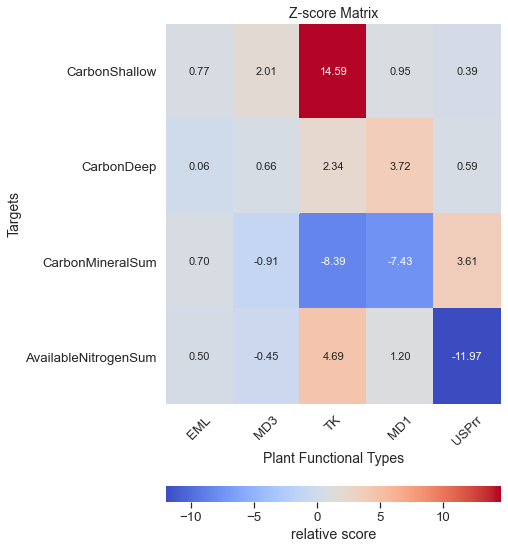

In [30]:
z_matrix_soil = pd.DataFrame({'EML': soil_eml,'MD3': soil_md3,'TK': soil_tk, 'MD1': soil_md1,
                             'USPrr': soil_USPrr})
z_matrix_soil.index=['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']
site_metric_matrix(z_matrix_soil, 'Z-score')

In [7]:
xparams_USPrr, ymodel_USPrr =  ut.get_best_match(df_param_USPrr,df_model_USPrr)
xparams_USPrr.sort_values(by=['r2rmse'],ascending=True)[:10]
ymodel_USPrr.sort_values(by=['r2rmse'],ascending=True)[:10]

,CarbonShallow,CarbonDeep,CarbonMineralSum,OrganicNitrogenSum,AvailableNitrogenSum,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
144,3834.061786,22278.280386,49911.418377,2823.786567,0.149425,0.987376,4.460832e+06,8.089445,0.987376,0.013144,0.013144
162,3484.513708,24851.822110,50253.092351,2896.680871,0.108647,0.982484,6.430261e+06,11.228515,0.981673,0.018293,0.018293
5,3707.599231,24212.258169,50656.203214,2859.068558,0.349605,0.981986,6.657491e+06,3.399960,0.981082,0.018823,0.018823
63,3945.184791,25481.559361,50224.174105,2944.292219,0.066926,0.981016,6.954125e+06,18.268562,0.979990,0.019822,0.019822
400,3783.946380,25842.839793,49989.822731,2910.114642,0.113256,0.980854,6.997705e+06,10.754573,0.979810,0.019987,0.019987
119,3143.662085,24637.283890,51586.186471,2898.112690,0.062015,0.975656,9.410754e+06,19.777004,0.973619,0.025538,0.025538
410,7175.633894,21804.660507,51744.567333,2767.902305,0.011037,0.972039,1.016607e+07,111.427513,0.969691,0.029178,0.029178
495,4603.189456,29251.019130,50283.544366,3186.458782,1.756551,0.961446,1.457529e+07,0.605648,0.957283,0.040364,0.040364
41,3839.400087,17214.643753,52124.120461,2846.375719,0.077594,0.960221,1.495819e+07,15.782374,0.955901,0.041627,0.041627
3,8549.167647,20590.222964,52497.666460,2782.976646,0.037583,0.959818,1.475031e+07,32.693213,0.955584,0.041963,0.041963


In [98]:
ymodel_USPrr.sort_values(by=['R2'],ascending=False)[:10]

,CarbonShallow,CarbonDeep,CarbonMineralSum,OrganicNitrogenSum,AvailableNitrogenSum,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
144,3834.061786,22278.280386,49911.418377,2823.786567,0.149425,0.987376,4.460832e+06,8.089445,0.987376,0.013144,0.013144
162,3484.513708,24851.822110,50253.092351,2896.680871,0.108647,0.982484,6.430261e+06,11.228515,0.981673,0.018293,0.018293
5,3707.599231,24212.258169,50656.203214,2859.068558,0.349605,0.981986,6.657491e+06,3.399960,0.981082,0.018823,0.018823
63,3945.184791,25481.559361,50224.174105,2944.292219,0.066926,0.981016,6.954125e+06,18.268562,0.979990,0.019822,0.019822
400,3783.946380,25842.839793,49989.822731,2910.114642,0.113256,0.980854,6.997705e+06,10.754573,0.979810,0.019987,0.019987
119,3143.662085,24637.283890,51586.186471,2898.112690,0.062015,0.975656,9.410754e+06,19.777004,0.973619,0.025538,0.025538
410,7175.633894,21804.660507,51744.567333,2767.902305,0.011037,0.972039,1.016607e+07,111.427513,0.969691,0.029178,0.029178
495,4603.189456,29251.019130,50283.544366,3186.458782,1.756551,0.961446,1.457529e+07,0.605648,0.957283,0.040364,0.040364
41,3839.400087,17214.643753,52124.120461,2846.375719,0.077594,0.960221,1.495819e+07,15.782374,0.955901,0.041627,0.041627
3,8549.167647,20590.222964,52497.666460,2782.976646,0.037583,0.959818,1.475031e+07,32.693213,0.955584,0.041963,0.041963


In [83]:
xparams_USPrr.sort_values(by=['r2rmsemape'],ascending=True)[:10]

,micbnup,kdcrawc,kdcsoma,kdcsompr,kdcsomcr,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
144,1.034717,0.159833,0.071426,0.005763,0.000017,0.987376,4.460832e+06,8.089445,0.987376,0.013144,0.013144
162,1.448248,0.650197,0.568469,0.003083,0.000022,0.982484,6.430261e+06,11.228515,0.981673,0.018293,0.018293
5,0.564732,0.208677,0.766171,0.003207,0.000100,0.981986,6.657491e+06,3.399960,0.981082,0.018823,0.018823
63,1.545538,0.493957,0.014622,0.003251,0.000036,0.981016,6.954125e+06,18.268562,0.979990,0.019822,0.019822
400,1.202606,0.508619,0.234107,0.002610,0.000050,0.980854,6.997705e+06,10.754573,0.979810,0.019987,0.019987
119,1.348196,0.967239,0.086005,0.003072,0.000043,0.975656,9.410754e+06,19.777004,0.973619,0.025538,0.025538
410,1.866178,0.020034,0.127258,0.221657,0.000046,0.972039,1.016607e+07,111.427513,0.969691,0.029178,0.029178
495,0.898986,0.122303,0.168754,0.001235,0.000004,0.961446,1.457529e+07,0.605648,0.957283,0.040364,0.040364
41,1.616240,0.119093,0.216138,0.005371,0.000029,0.960221,1.495819e+07,15.782374,0.955901,0.041627,0.041627
3,1.853501,0.019023,0.384091,0.172243,0.000072,0.959818,1.475031e+07,32.693213,0.955584,0.041963,0.041963
